# <font color='darkblue'> WIZARDRY SCHOOL ENROLLEMENT
    
#### Students: 
   
- Afonso Cadete | 20211519
- Laura Matias | 20221836   
- Marta Almendra | 20221878
- Matilde Casimiro | 20221940
- Teresa Simão | 20221873
    
    
### <font color='skyblue'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [1. Preprocessing & Exploratory Data Analysis](#P1)
    - [Missing Values & Data Types](#P1.1)
    - [Distributions & Outliers](#P1.2)
    - [Duplicates](#P1.3)
    - [Correlations](#P1.4)
- [2. Data Preparation](#P2) 
    - [2.1. Features and Target Distinction](#P2.1)
    - [2.2. Data Partition](#P2.2)
    - [2.3. Categorical Features One-Hot Encoding](#P2.3)
    - [2.4. Numerical and Categorical Features Concatenation](#P2.4)
    - [2.5. Missing Values Imputation](#P2.5)
    - [2.6. Scaling](#P2.6)
- [3. Feature Selection](#P3) 
    - [Categorical Features](#P3.1)
    - [Numerical Features](#P3.2)
    - [No Scaling](#P3.3)
    - [Standard Scaler](#P3.4)
    - [MinMax Scaler](#P3.5)
    - [Robust Scaler](#P3.6)
    - [Principal Component Analysis (PCA)](#P3.7)
- [4. Model Evaluation](#P4) 
    - [Logistic Regression](#P4.1)
    - [Decision Tree](#P4.2)
    - [KNeighboors](#P4.3)
    - [Naive-Bayes](#P4.4)
    - [Multi-Layer Perceptron](#P4.5)
- [5. Best Model](#P5) 

#### Importing the necessary libraries

In [1]:
### Basic Libraries
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd

### Visualization
# !pip install matplotlib
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

### Sklearn
# !pip install scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score, classification_report, silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

### Stats
# !pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import chi2_contingency

### Other
from itertools import combinations
from collections import defaultdict
from joblib import Parallel, delayed
# !pip install umap-learn
import umap
import csv

### Warnings
import warnings
warnings.filterwarnings('ignore')

### Functions
from utils import *

### Autoreload
%load_ext autoreload
%autoreload 2

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_20276\3262112742.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\Afonso Cadete\anaconda3\envs\tm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Importing the data

In [6]:
#path = 'G://O meu disco//Universidade//3rd year//1st semester//Machine Learning I (2)//Project//'
path = 'ml_datasets/'

train_data = pd.read_csv(path + 'Project_train_dataset.csv', index_col = 'Student ID')
test_data = pd.read_csv(path + 'Project_test_dataset.csv', index_col = 'Student ID')

In [7]:
train = train_data.copy()
X_test = test_data.copy()

# <font color='darkblue'> Preprocessing and Exploratory Data Analysis</font> <a class="anchor" id="P1"></a>
  [Back to TOC](#toc)

In [8]:
# Visualize the dataset
train

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,,
1,Sorcery School,male,22.0,1,0,7.2500,NaN,Mystic Academy,18,Fire,0
2,Magi Academy,female,38.0,1,0,71.2833,Cottage Chamber,Eldertree Enclave,7,Fire,1
3,Sorcery School,female,26.0,0,0,7.9250,NaN,Mystic Academy,12,Air,1
5,Sorcery School,male,35.0,0,0,8.0500,NaN,Mystic Academy,12,Air,0
6,Sorcery School,male,NaN,0,0,8.4583,NaN,Arcan Institute,11,Earth,0
...,...,...,...,...,...,...,...,...,...,...,...
883,Sorcery School,female,22.0,0,0,10.5167,NaN,Mystic Academy,17,Earth,0
884,Witchcraft Institute,male,28.0,0,0,10.5000,NaN,Mystic Academy,9,Water,0
887,Witchcraft Institute,male,27.0,0,0,13.0000,NaN,Mystic Academy,8,Water,0


## <font color='skyblue'> Missing Values & Data Types <a class="anchor" id="P1.1"></a>

In [9]:
# Get data info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1 to 889
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Program                   713 non-null    object 
 1   Student Gender            713 non-null    object 
 2   Experience Level          567 non-null    float64
 3   Student Siblings          713 non-null    int64  
 4   Student Family            713 non-null    int64  
 5   Financial Background      713 non-null    float64
 6   School Dormitory          153 non-null    object 
 7   School of Origin          713 non-null    object 
 8   Student Social Influence  713 non-null    int64  
 9   Favourite Study Element   713 non-null    object 
 10  Admitted in School        713 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


#### `Experience Level`

In [10]:
# Calculate the percentage of missing values in the 'Experience Level' column
null_expl = round((train['Experience Level'].isna().sum() / len(train)) * 100, 1)

# Print the percentage of missing values in the 'Experience Level' column
print(f'About {null_expl}% of data points in the column Experience Level are missing values')

About 20.5% of data points in the column Experience Level are missing values


#### `School Dormitory`

In [11]:
# Calculate the percentage of missing values in the 'School Dormitory' column
null_sd = round((train['School Dormitory'].isna().sum() / len(train)) * 100 , 1)

# Print the percentage of missing values in the 'School Dormitory' column
print(f'About {null_sd}% of data points in the column School Dormitory are missing values')

About 78.5% of data points in the column School Dormitory are missing values


In [12]:
# More than half of the School Dormitory column is missing, so we drop the column
train.drop('School Dormitory', axis=1, inplace=True)

## <font color='skyblue'>  Distributions & Outliers <a class="anchor" id="P1.2"></a>

### Categorical Variables

In [13]:
# Get the categorical variables description
train.describe(exclude=['number']).T

,count,unique,top,freq
Program,713,3,Sorcery School,391
Student Gender,713,2,male,469
School of Origin,713,3,Mystic Academy,524
Favourite Study Element,713,4,Earth,184


#### `Student Gender`

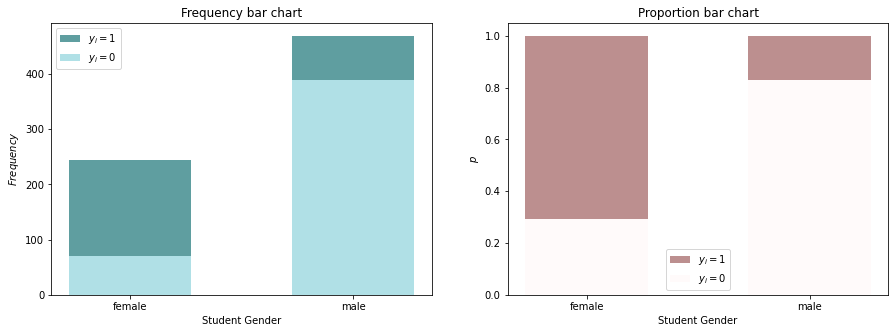

In [14]:
bar_charts_categorical(train, 'Student Gender', 'Admitted in School')

In [15]:
# Print the percentage of males in the 'Student Gender' column
print('Percentage of males: {}%'.format(
    round(100*len(train[train['Student Gender'] == 'male'])/len(train), 2)))

Percentage of males: 65.78%


#### `Program`

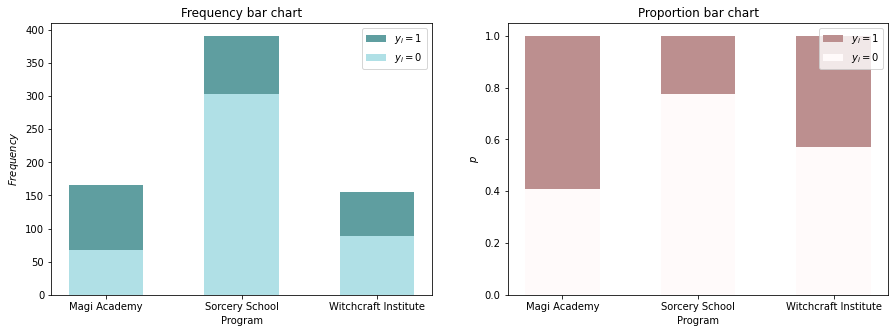

In [16]:
bar_charts_categorical(train, 'Program', 'Admitted in School')

#### `School of Origin`

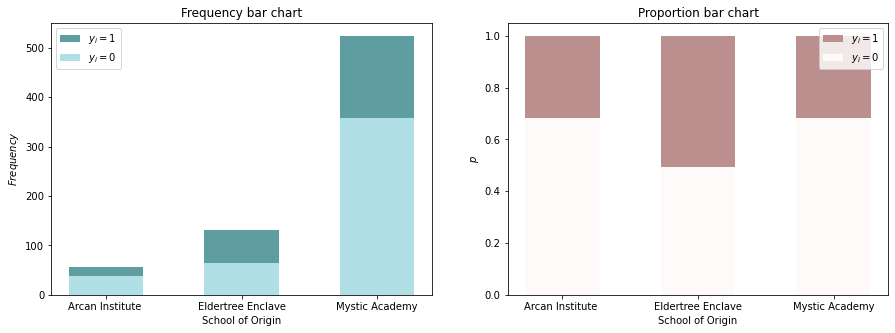

In [17]:
bar_charts_categorical(train, 'School of Origin', 'Admitted in School')

#### `Favourite Study Element`

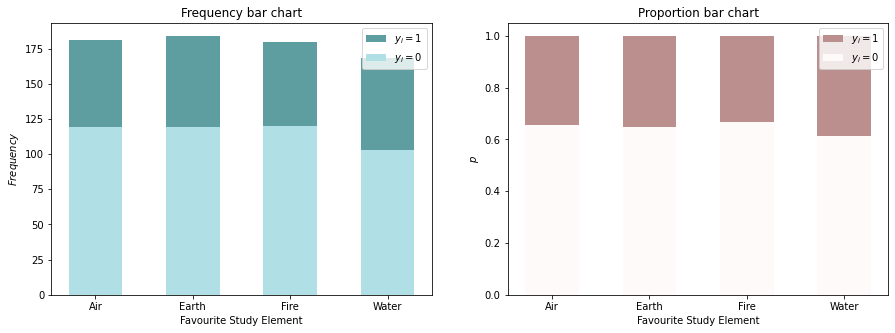

In [18]:
bar_charts_categorical(train, 'Favourite Study Element', 'Admitted in School')

### Numerical Variables

In [19]:
# Get the numerical variables description
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Experience Level,567.0,29.890952,14.599272,0.42,20.750,28.0,39.0,80.0000
Student Siblings,713.0,0.521739,1.057287,0.00,0.000,0.0,1.0,8.0000
Student Family,713.0,0.354839,0.770985,0.00,0.000,0.0,0.0,6.0000
Financial Background,713.0,31.327238,50.903034,0.00,7.925,14.4,30.0,512.3292
Student Social Influence,713.0,12.719495,6.949648,1.00,7.000,13.0,19.0,24.0000
Admitted in School,713.0,0.353436,0.478372,0.00,0.000,0.0,1.0,1.0000


#### `Student Siblings` & `Student Family`

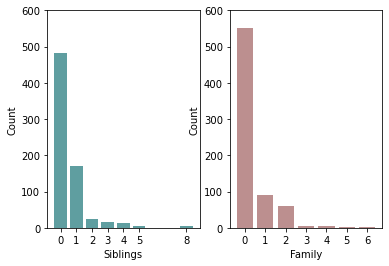

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_bar_chart(ax1, train, 'Student Siblings', 'Siblings', y_lim = [0, 600])
plot_bar_chart(ax2, train, 'Student Family', 'Family', y_lim = [0, 600], color = 'rosybrown')

In [21]:
train[train['Student Siblings'] == 8]

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,
160,Sorcery School,male,NaN,8,2,69.55,Mystic Academy,2,Fire,0
181,Sorcery School,female,NaN,8,2,69.55,Mystic Academy,17,Earth,0
793,Sorcery School,female,NaN,8,2,69.55,Mystic Academy,2,Air,0
864,Sorcery School,female,NaN,8,2,69.55,Mystic Academy,18,Water,0


**All** the Student Siblings outliers (4):
- are from the 'Sorcery School' `Program` and the 'Mystic Academy' `School of Origin` 
- also have the same values in `Student Siblings`, `Student Family` and `Financial Background`, which raises the possibility of being siblings
- were not `Admitted in School`

#### `Experience Level`

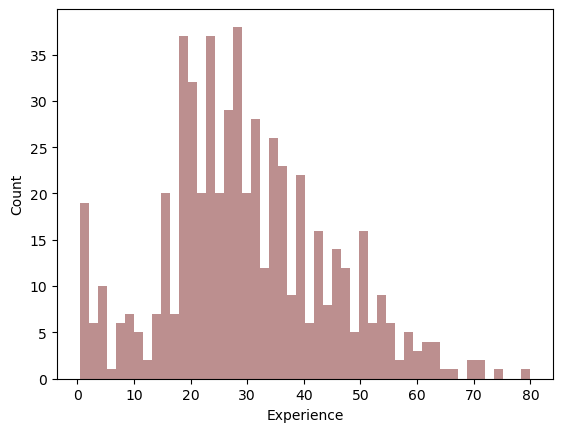

In [23]:
fig, ax = plt.subplots()
plot_histogram(ax, train, 'Experience Level', 'Experience')

#### `Financial Background`

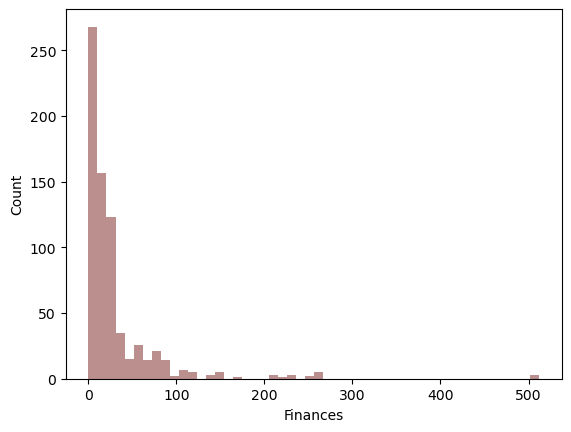

In [24]:
fig, ax = plt.subplots()
plot_histogram(ax, train, 'Financial Background', 'Finances')

In [25]:
train[train['Financial Background'] > 300] #3

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,
259,Magi Academy,female,35.0,0,0,512.3292,Eldertree Enclave,15,Air,1
680,Magi Academy,male,36.0,0,1,512.3292,Eldertree Enclave,6,Earth,1
738,Magi Academy,male,35.0,0,0,512.3292,Eldertree Enclave,15,Water,1


**All** the outliers (3):
- are from the 'Magi Academy' `Program` and the 'Eldertree Enclave' `School of Origin` - none of them are the most common category in their respective variables
- have an high `Experience Level` (around the 3rd quartile)
- have no `Student Siblings`
- have a `Financial Background` of 512.3292
- are `Admitted in School`

In [26]:
train[(train['Financial Background'] > 200) & ~(train['Financial Background'] > 300)] #17
# train[train['Financial Background'] > 200]['School of Origin'].value_counts() # E:9; M:8
# train[train['Financial Background'] > 200]['Student Gender'].value_counts() # F:10; M:7

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,
28,Magi Academy,male,19.0,3,2,263.0000,Mystic Academy,5,Fire,0
89,Magi Academy,female,23.0,3,2,263.0000,Mystic Academy,21,Air,1
119,Magi Academy,male,24.0,0,1,247.5208,Eldertree Enclave,24,Fire,0
300,Magi Academy,female,50.0,0,1,247.5208,Eldertree Enclave,21,Earth,1
342,Magi Academy,female,24.0,3,2,263.0000,Mystic Academy,20,Air,1
381,Magi Academy,female,42.0,0,0,227.5250,Eldertree Enclave,21,Fire,1
439,Magi Academy,male,64.0,1,4,263.0000,Mystic Academy,23,Fire,0
528,Magi Academy,male,NaN,0,0,221.7792,Mystic Academy,20,Earth,0
558,Magi Academy,male,NaN,0,0,227.5250,Eldertree Enclave,6,Earth,0


Extreme values (14):
- all of them are from 'Magi Academy' `Program`
- only 5 of them are males (`Student Gender`) - around 66% of the observations are males
- 29, 89 and 342 are surely `Student Siblings` and, probably, 439 is their `Student Family`

#### `Admitted in School` --- outcome

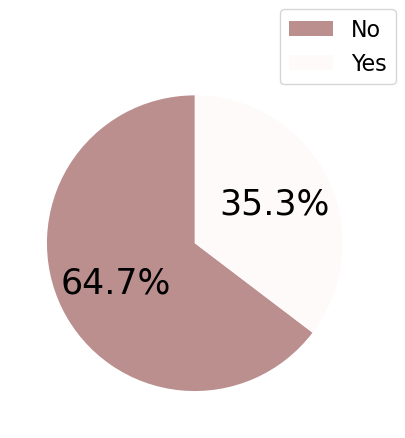

In [27]:
plot_pie_chart(train, 'Admitted in School', colors = ['rosybrown', 'snow'],
               legend = ['No', 'Yes']) 

unbalanced dataset


## <font color='skyblue'> Duplicates <a class="anchor" id="P1.3"></a>

In [28]:
train[train.duplicated()] 

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,


In [29]:
train[train.index.duplicated()] 

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,


There are no duplicate values in this dataset.

## <font color='skyblue'> Correlations <a class="anchor" id="P1.4"></a>

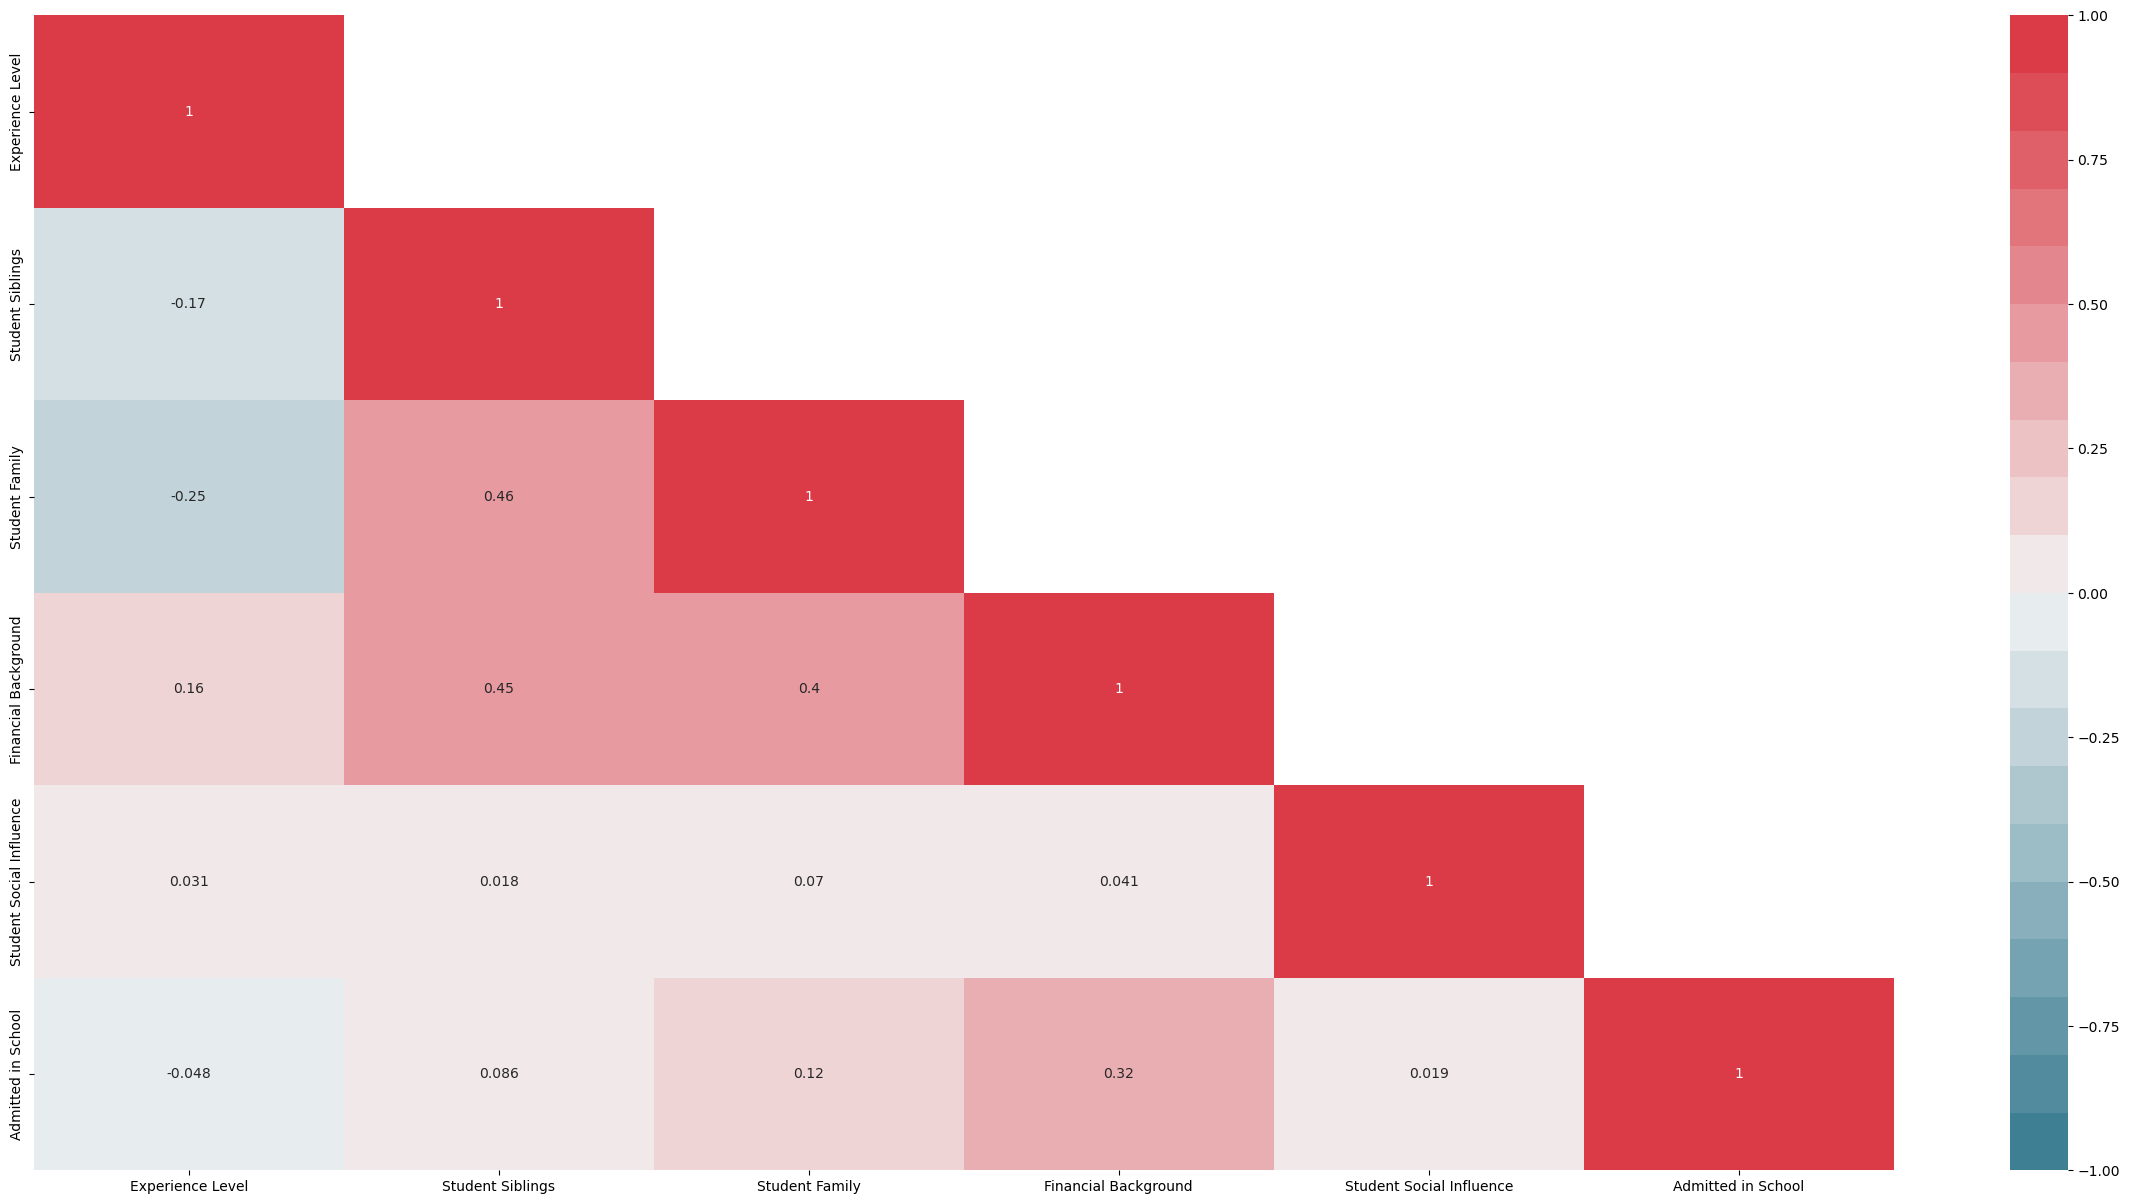

In [30]:
plot_correlation_matrix(train, 'spearman')

### `Student Siblings` x `Student Family` x `Financial Background`

In [31]:
# Select specific columns for distribution comparison
corr_train = train.loc[:, ['Student Siblings', 'Student Family', 'Financial Background']]

# Perform standard scaling on the numerical columns
corr_train_mm = MinMaxScaler().fit_transform(corr_train)

# Create a new DataFrame with the scaled values
corr_train_mm = pd.DataFrame(
    corr_train_mm, 
    columns=corr_train.columns, 
    index=corr_train.index)

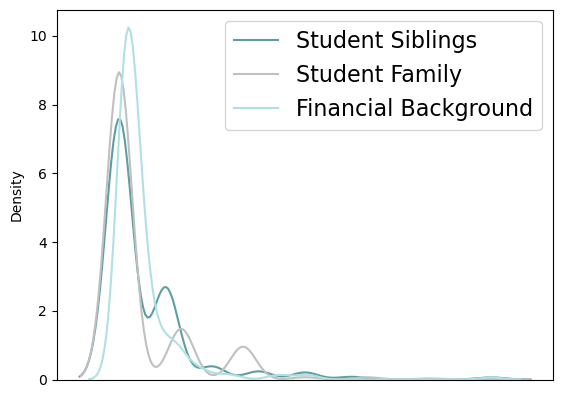

In [32]:
# Create KDE plots for the scaled numerical columns
sns.kdeplot(corr_train_mm['Student Siblings'], color='cadetblue')
sns.kdeplot(corr_train_mm['Student Family'], color='silver')
sns.kdeplot(corr_train_mm['Financial Background'], color='powderblue')

# Set the legend and label the x-axis
plt.legend(['Student Siblings', 'Student Family', 'Financial Background'], fontsize=16)
plt.gca().set_xticks([])
plt.xlabel('')

# Display the plot
plt.show()

# <font color='darkblue'> Data Preparation</font> <a class="anchor" id="P2"></a>
  [Back to TOC](#toc)

## <font color='skyblue'> 1. Features and Target Distinction <a class="anchor" id="P2.1"></a>

In [33]:
# Define X and y
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

## <font color='skyblue'> 2. Data Type Distinction <a class="anchor" id="P2.2"></a>

In [34]:
# Split the training and test data into separate DataFrames for numerical and categorical columns
X_train_n, X_train_c = datatype_distinction(X_train)
X_test_n, X_test_c = datatype_distinction(X_test)

## <font color='skyblue'> 3. Categorical Features One-Hot Encoding <a class="anchor" id="P2.3"></a>

In [35]:
# Create a ColumnTransformer for encoding categorical features with OneHotEncoder
# The transformer is set to apply OneHotEncoder to columns 0, 1, 2, and 3 and keep the remaining columns as is
ct = ColumnTransformer([
    ('oneHot', OneHotEncoder(drop='first'), [0, 1, 2, 3])
], remainder='passthrough')

# Use the data_transform function to transform categorical features in both training and test sets
# This applies the ColumnTransformer to encode categorical features and keeps the rest unchanged
X_train_c, X_test_c = data_transform(ct, X_train_c, X_test_c, column_transformer=True)

In [36]:
# Replace 'oneHot__' in column names of categorical features in both training and test sets with an empty string
# This operation modifies the column names in place
X_train_c.columns = X_train_c.columns.str.replace('oneHot__', '')
X_test_c.columns = X_test_c.columns.str.replace('oneHot__', '')

## <font color='skyblue'> 4. Numerical and Categorical Features Concatenation <a class="anchor" id="P2.4"></a>

In [37]:
# Concatenate the numeric and categorical features horizontally for both training and test sets
X_train = pd.concat([X_train_n, X_train_c], axis=1)
X_test = pd.concat([X_test_n, X_test_c], axis=1)

## <font color='skyblue'> 5. Missing Values Imputation <a class="anchor" id="P2.5"></a>

In [38]:
# Initialize a MinMaxScaler for the imputation process
impute_scaler = MinMaxScaler()

# Use the data_transform function to scale the features in both training and test sets
# Scale features in X_train and X_test using the impute_scaler
X_train_to_impute, X_test_to_impute = data_transform(impute_scaler, X_train, X_test)

# Initialize a KNNImputer to handle missing values in the data
imputer = KNNImputer()

# Use the KNNImputer to impute missing values in both training and test sets
# Replace missing values in X_train_to_impute and X_test_to_impute with imputed values
X_train_imputed, X_test_imputed = data_transform(imputer, X_train_to_impute, X_test_to_impute)

In [39]:
# Inverse transform the imputed and scaled data to the original scale for both training and test sets
X_train = pd.DataFrame(
    impute_scaler.inverse_transform(X_train_imputed),
    index=X_train.index,
    columns=X_train.columns
)

X_test = pd.DataFrame(
    impute_scaler.inverse_transform(X_test_imputed),
    index=X_test.index,
    columns=X_test.columns
)

## <font color='skyblue'> 6. Scaling <a class="anchor" id="P2.6"></a>

In [40]:
# Apply each scaler to the features in both training and test sets
# Save the transformed data into two new DataFrames
X_train_st, X_test_st = data_transform(StandardScaler(), X_train, X_test)
# X_train_mm, X_test_mm = data_transform(MinMaxScaler(), X_train, X_test)
# X_train_rb, X_test_rb = data_transform(RobustScaler(), X_train, X_test)

# <font color='darkblue'> Feature Selection</font> <a class="anchor" id="P3"></a>
  [Back to TOC](#toc)

## <font color='skyblue'> 1. Categorical Features <a class="anchor" id="P3.1"></a>

In [35]:
# Iterate through categorical columns in X_train
for var in X_train.iloc[:, 5:]:
    # Perform a test for independence (chi-squared) between each variable and y_train
    TestIndependence(X_train.iloc[:, 5:][var], y_train, var)

Program_Sorcery School is IMPORTANT for Prediction
Program_Witchcraft Institute is IMPORTANT for Prediction
Student Gender_male is IMPORTANT for Prediction
School of Origin_Eldertree Enclave is IMPORTANT for Prediction
School of Origin_Mystic Academy is IMPORTANT for Prediction
Favourite Study Element_Earth is NOT an important predictor. (Discard Favourite Study Element_Earth from model)
Favourite Study Element_Fire is NOT an important predictor. (Discard Favourite Study Element_Fire from model)
Favourite Study Element_Water is NOT an important predictor. (Discard Favourite Study Element_Water from model)


## <font color='skyblue'> 2. Numerical Features <a class="anchor" id="P3.2"></a>
*Boolean features included*

⚠️ Cells with the feature selection function take a long time to run, so if you want to run your results uncomment the code. In any case, the results are analysed at the end of each section. ⚠️

## <font color='skyblue'> No Scaling <a class="anchor" id="P3.3"></a>



UNIVARIATE VARIABLES:
Experience Level                       183.095520
Student Siblings                         1.117855
Student Family                           0.594418
Financial Background                  2591.118872
Student Social Influence                48.297611
Program_Sorcery School                   0.248007
Program_Witchcraft Institute             0.171163
Student Gender_male                      0.225420
School of Origin_Eldertree Enclave       0.151071
School of Origin_Mystic Academy          0.195085
Favourite Study Element_Earth            0.191736
Favourite Study Element_Fire             0.188986
Favourite Study Element_Water            0.180358
dtype: float64


TREE-BASED:

Selected features:
-> Experience Level
-> Student Siblings
-> Student Family
-> Financial Background
-> Student Social Influence
-> Program_Sorcery School
-> Student Gender_male


CORRELATIONS:


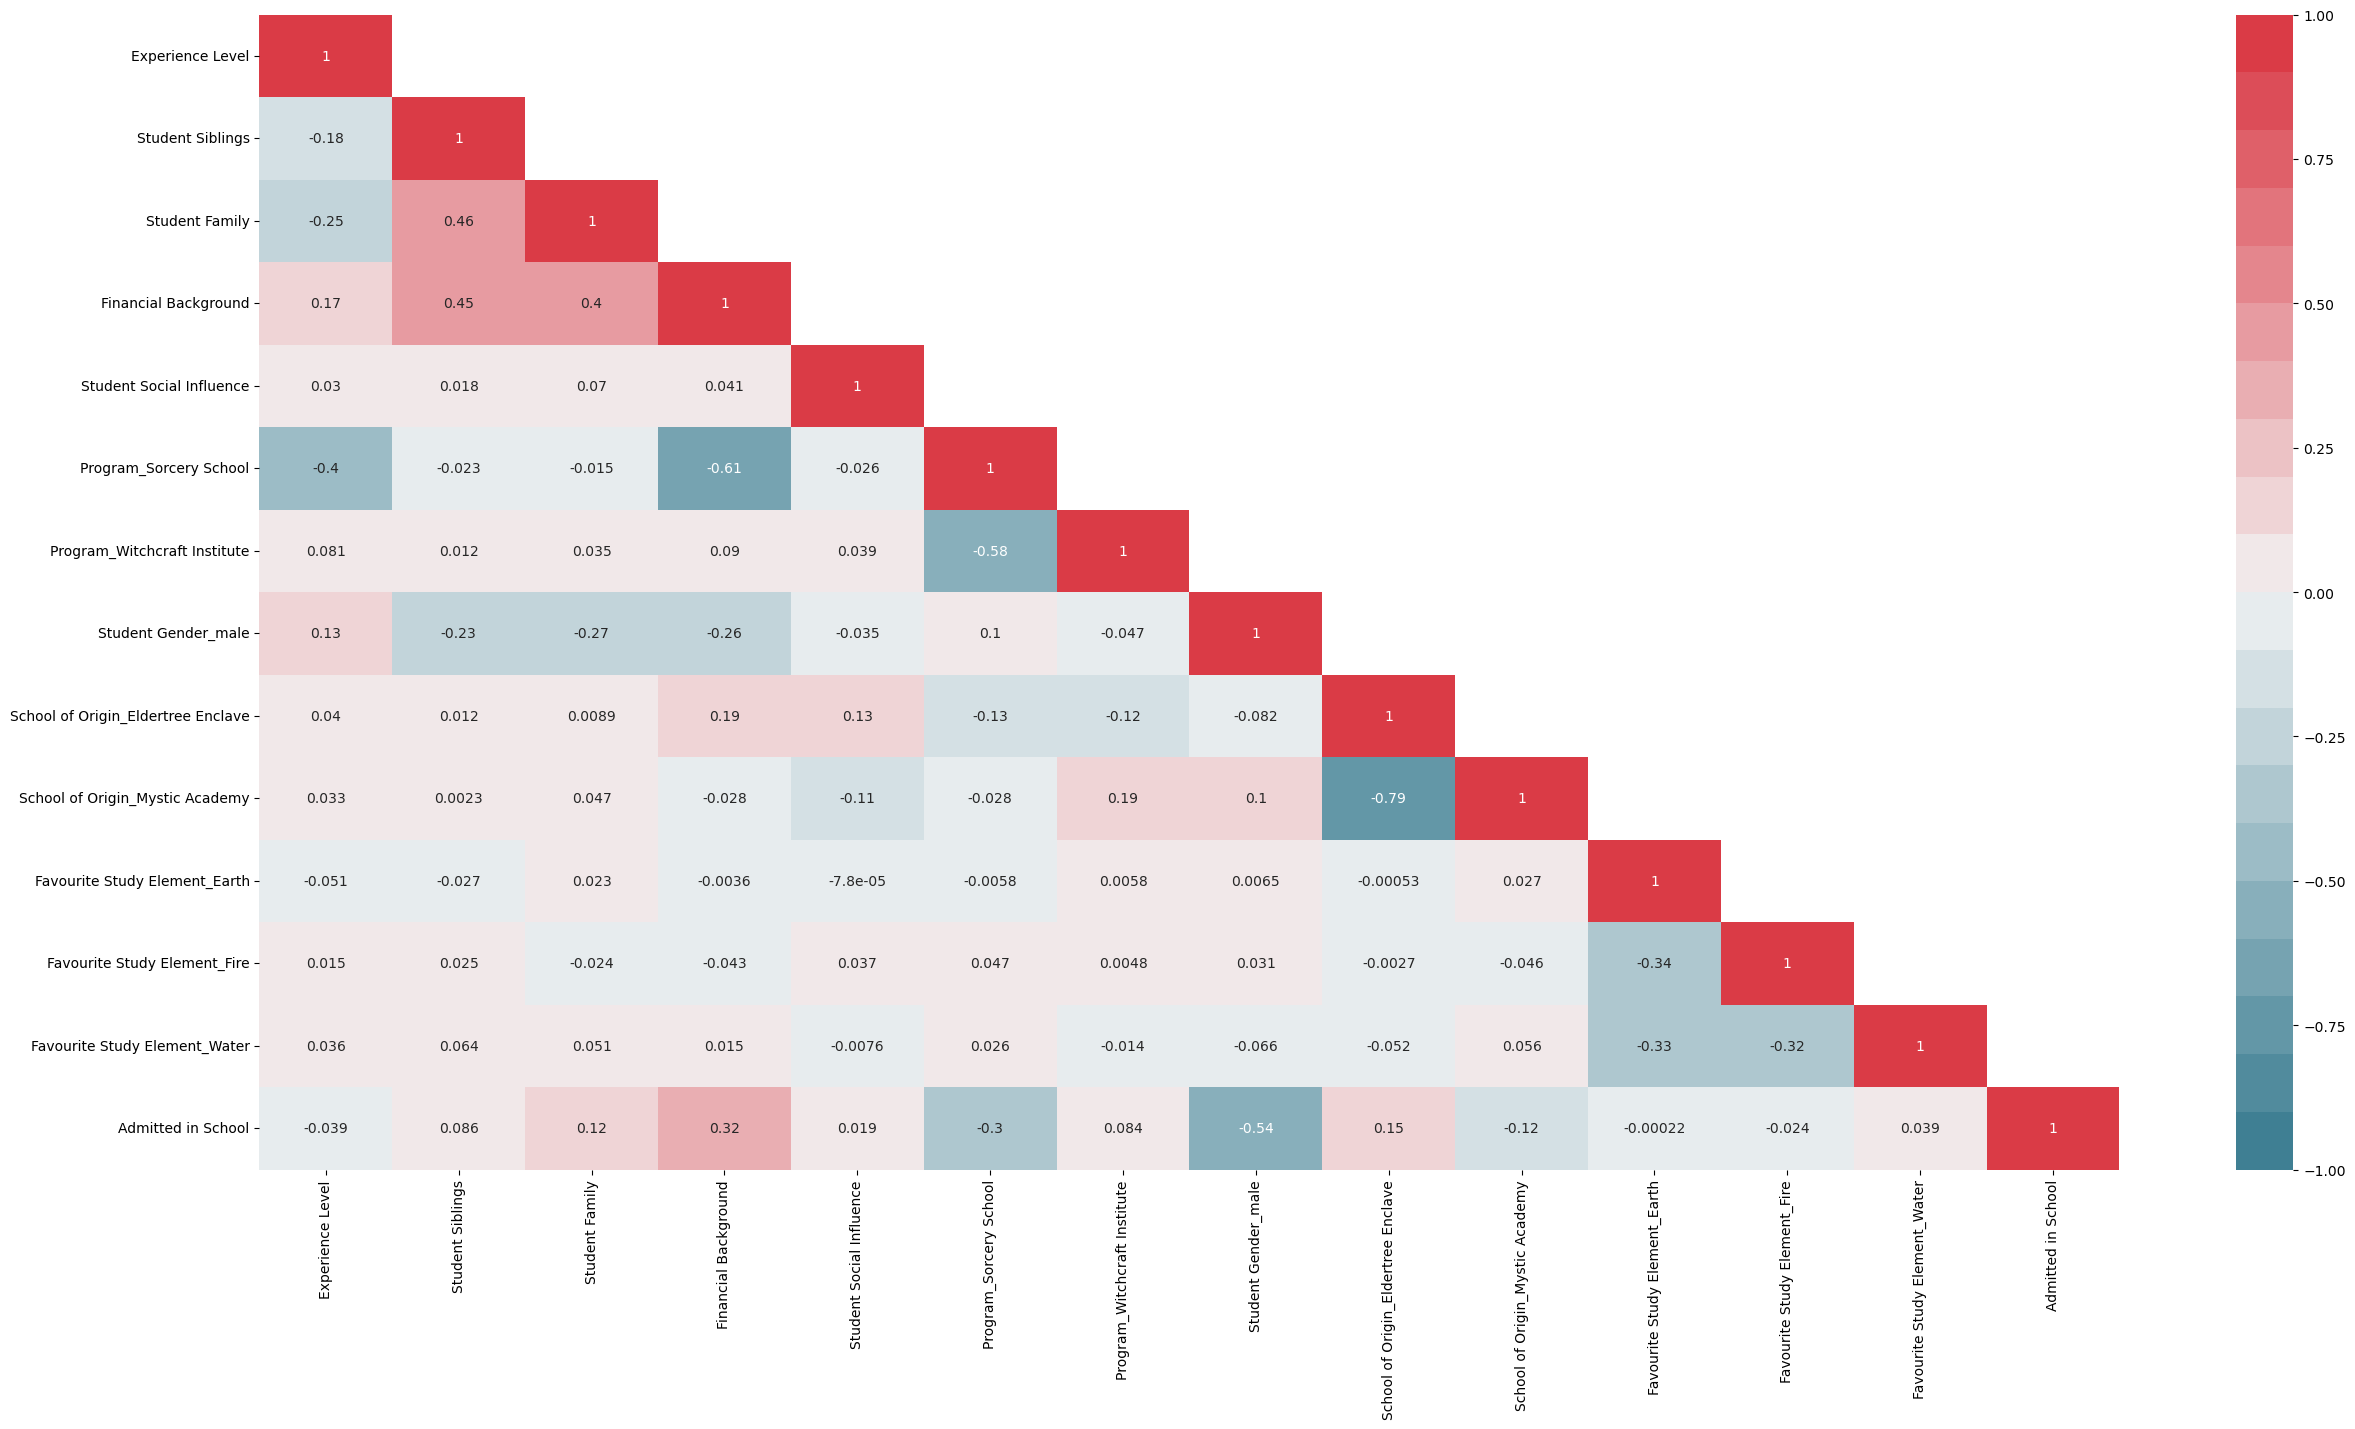



VIF:
Variables with Moderate Multicollinearity:
                              Features  VIF Factor
1                     Student Siblings    1.632956
2                       Student Family    1.647905
12       Favourite Study Element_Water    1.907836
10       Favourite Study Element_Earth    1.940876
11        Favourite Study Element_Fire    1.961757
3                 Financial Background    2.036707
6         Program_Witchcraft Institute    2.208968
8   School of Origin_Eldertree Enclave    2.704842
7                  Student Gender_male    3.249935
5               Program_Sorcery School    3.935430
4             Student Social Influence    4.253403

Variables with High Multicollinearity (discard):
                          Features  VIF Factor
0                 Experience Level    5.873035
9  School of Origin_Mystic Academy    7.923013


EXHAUSTIVE:
Variable Occurrences:
-> Experience Level: 100
-> Student Siblings: 100
-> Student Family: 21
-> Student Social Influence: 31
-> Prog

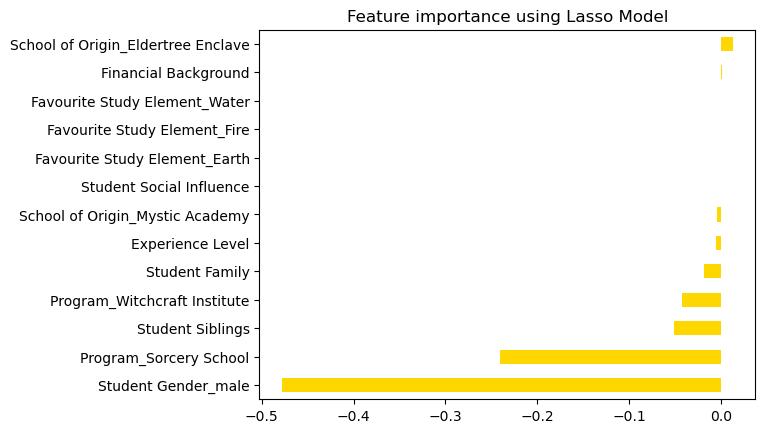

In [37]:
feature_selection(X_train, y_train, iterations=100)

| Predictor | Chi-Square | Univariate | Tree-Based | Spearman | VIF | Exhaustive | Lasso | What to do? | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Experience Level | *Not applicable* | Keep | Keep  | Discard | Discard | Keep | Keep(?) | Discard |
| Student Siblings | *Not applicable* | Keep | Keep | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Student Family | *Not applicable* | Keep | Keep | Discard | Keep | Discard | Keep(?) | Discard |
| Financial Background | *Not applicable* | Keep | Keep | Discard | Keep | Discard | Keep(?) | Discard |
| Student Social Influence | *Not applicable* | Keep | Keep | Discard | Keep | Discard | Discard | Discard |
| Program_Sorcery School | Keep | Keep | Keep | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Program_Witchcraft Institute | Keep | Keep | Discard | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Student Gender_male | Keep | Keep | Keep | Keep(?) | Keep | Keep | Keep | <b>Include in the model<b> |
| School of Origin_Eldertree Enclave | Keep | Keep | Discard | Discard | Keep | Keep(?) | Keep(?) | <b>Include in the model<b> |
| School of Origin_Mystic Academy | Keep | Keep | Discard | Discard | Discard | Keep(?) | Keep(?) | Discard |
| Favourite Study Element_Earth | Discard | Keep | Discard | Discard | Keep | Discard | Discard | Discard |
| Favourite Study Element_Fire | Discard | Keep | Discard | Discard | Keep | Discard | Discard | Discard |
| Favourite Study Element_Water | Discard | Keep | Discard | Discard | Keep | Keep(?) | Discard | Discard |


In [42]:
# Drop the columns excluded by non-scaler feature selection
X_train_ns_fs = X_train.drop(columns=['Experience Level', 'Student Family', 'Financial Background', 'Student Social Influence', 'School of Origin_Mystic Academy',
                                      'Favourite Study Element_Earth', 'Favourite Study Element_Fire', 'Favourite Study Element_Water'])

## <font color='skyblue'> Standard Scaler <a class="anchor" id="P3.4"></a>



UNIVARIATE VARIABLES:
Experience Level                      1.001404
Student Siblings                      1.001404
Student Family                        1.001404
Financial Background                  1.001404
Student Social Influence              1.001404
Program_Sorcery School                1.001404
Program_Witchcraft Institute          1.001404
Student Gender_male                   1.001404
School of Origin_Eldertree Enclave    1.001404
School of Origin_Mystic Academy       1.001404
Favourite Study Element_Earth         1.001404
Favourite Study Element_Fire          1.001404
Favourite Study Element_Water         1.001404
dtype: float64


TREE-BASED:

Selected features:
-> Experience Level
-> Student Siblings
-> Student Family
-> Financial Background
-> Student Social Influence
-> Program_Sorcery School
-> Student Gender_male


CORRELATIONS:


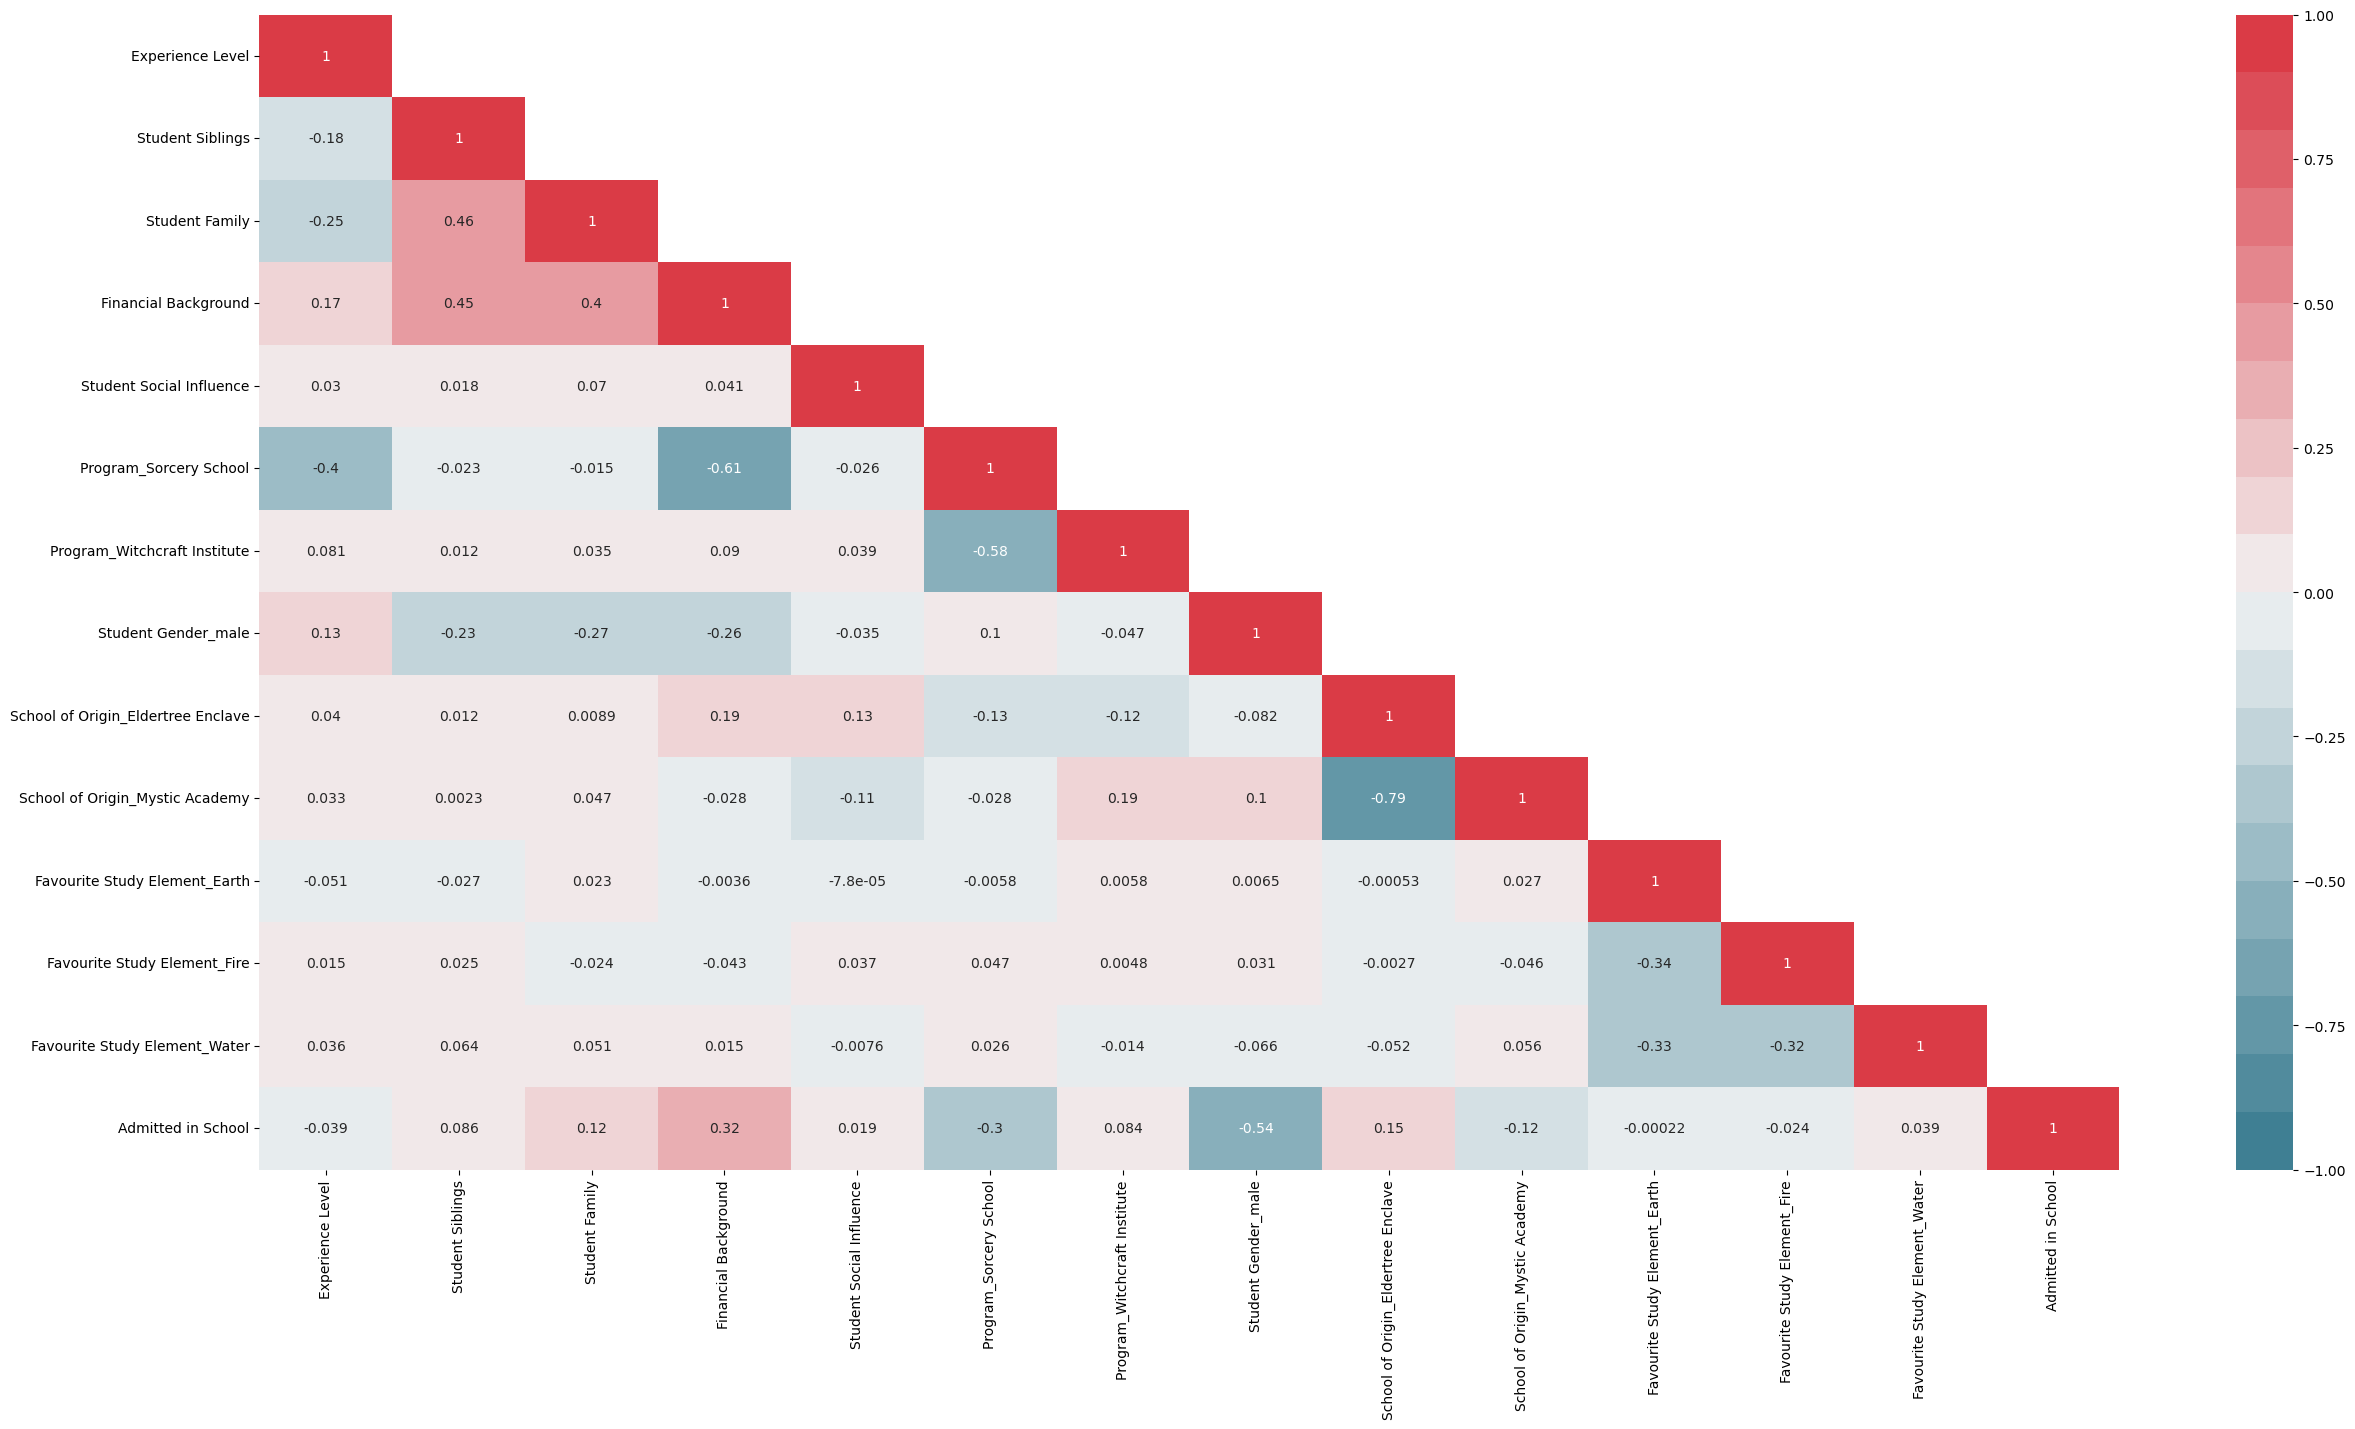



VIF:
Variables with Moderate Multicollinearity:
                              Features  VIF Factor
1                     Student Siblings    1.632956
2                       Student Family    1.647905
12       Favourite Study Element_Water    1.907836
10       Favourite Study Element_Earth    1.940876
11        Favourite Study Element_Fire    1.961757
3                 Financial Background    2.036707
6         Program_Witchcraft Institute    2.208968
8   School of Origin_Eldertree Enclave    2.704842
7                  Student Gender_male    3.249935
5               Program_Sorcery School    3.935430
4             Student Social Influence    4.253403

Variables with High Multicollinearity (discard):
                          Features  VIF Factor
0                 Experience Level    5.873035
9  School of Origin_Mystic Academy    7.923013


EXHAUSTIVE:
Variable Occurrences:
-> Experience Level: 100
-> Student Siblings: 100
-> Financial Background: 6
-> Program_Sorcery School: 100
-> 

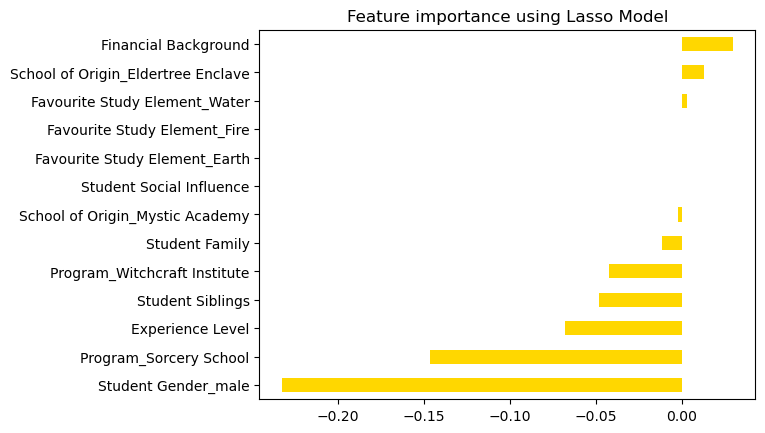

In [38]:
feature_selection(X_train, y_train, iterations=10, scaler=StandardScaler()) # In the real analysis were made 100 iterations

| Predictor | Chi-Square | Univariate | Tree-Based | Spearman | VIF | Exhaustive | Lasso | What to do? | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Experience Level | *Not applicable* | Keep | Keep | Discard | Discard | Keep | Keep | Discard |
| Student Siblings | *Not applicable* | Keep | Keep | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Student Family | *Not applicable* | Keep | Keep | Discard | Keep | Discard | Keep(?) | Discard |
| Financial Background | *Not applicable* | Keep | Keep | Discard | Keep | Discard | Keep | Try with and without |
| Student Social Influence | *Not applicable* | Keep | Keep | Discard | Keep | Keep(?) | Discard | Discard |
| Program_Sorcery School | Keep | Keep | Keep | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Program_Witchcraft Institute | Keep | Keep | Discard | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Student Gender_male | Keep | Keep | Keep | Keep(?) | Keep | Keep | Keep | <b>Include in the model<b> |
| School of Origin_Eldertree Enclave | Keep | Keep | Discard | Discard | Keep | Keep(?) | Keep(?) | <b>Include in the model<b> |
| School of Origin_Mystic Academy | Keep | Keep | Discard | Discard | Discard | Keep(?) | Keep(?) | Discard |
| Favourite Study Element_Earth | Discard | Keep | Discard | Discard | Keep | Discard | Discard | Discard |
| Favourite Study Element_Fire | Discard | Keep | Discard | Discard | Keep | Discard | Discard | Discard |
| Favourite Study Element_Water | Discard | Keep | Discard | Discard | Keep | Discard | Keep(?) | Discard |

In [43]:
# Drop the columns excluded by Standard scaler feature selection
X_train_st_fs = X_train.drop(columns=['Experience Level', 'Student Family', 'Student Social Influence', 'School of Origin_Mystic Academy', 
                                      'Favourite Study Element_Earth', 'Favourite Study Element_Fire', 'Favourite Study Element_Water'])

# Drop the "try with and without" variable from Standard scaler feature selection
X_train_st_fs_2 = X_train_st_fs.drop(columns=['Financial Background'])

## <font color='skyblue'> MinMax Scaler <a class="anchor" id="P3.5"></a>



UNIVARIATE VARIABLES:
Experience Level                      0.028911
Student Siblings                      0.017466
Student Family                        0.016512
Financial Background                  0.009872
Student Social Influence              0.091300
Program_Sorcery School                0.248007
Program_Witchcraft Institute          0.171163
Student Gender_male                   0.225420
School of Origin_Eldertree Enclave    0.151071
School of Origin_Mystic Academy       0.195085
Favourite Study Element_Earth         0.191736
Favourite Study Element_Fire          0.188986
Favourite Study Element_Water         0.180358
dtype: float64


TREE-BASED:

Selected features:
-> Experience Level
-> Student Siblings
-> Student Family
-> Financial Background
-> Student Social Influence
-> Program_Sorcery School
-> Student Gender_male


CORRELATIONS:


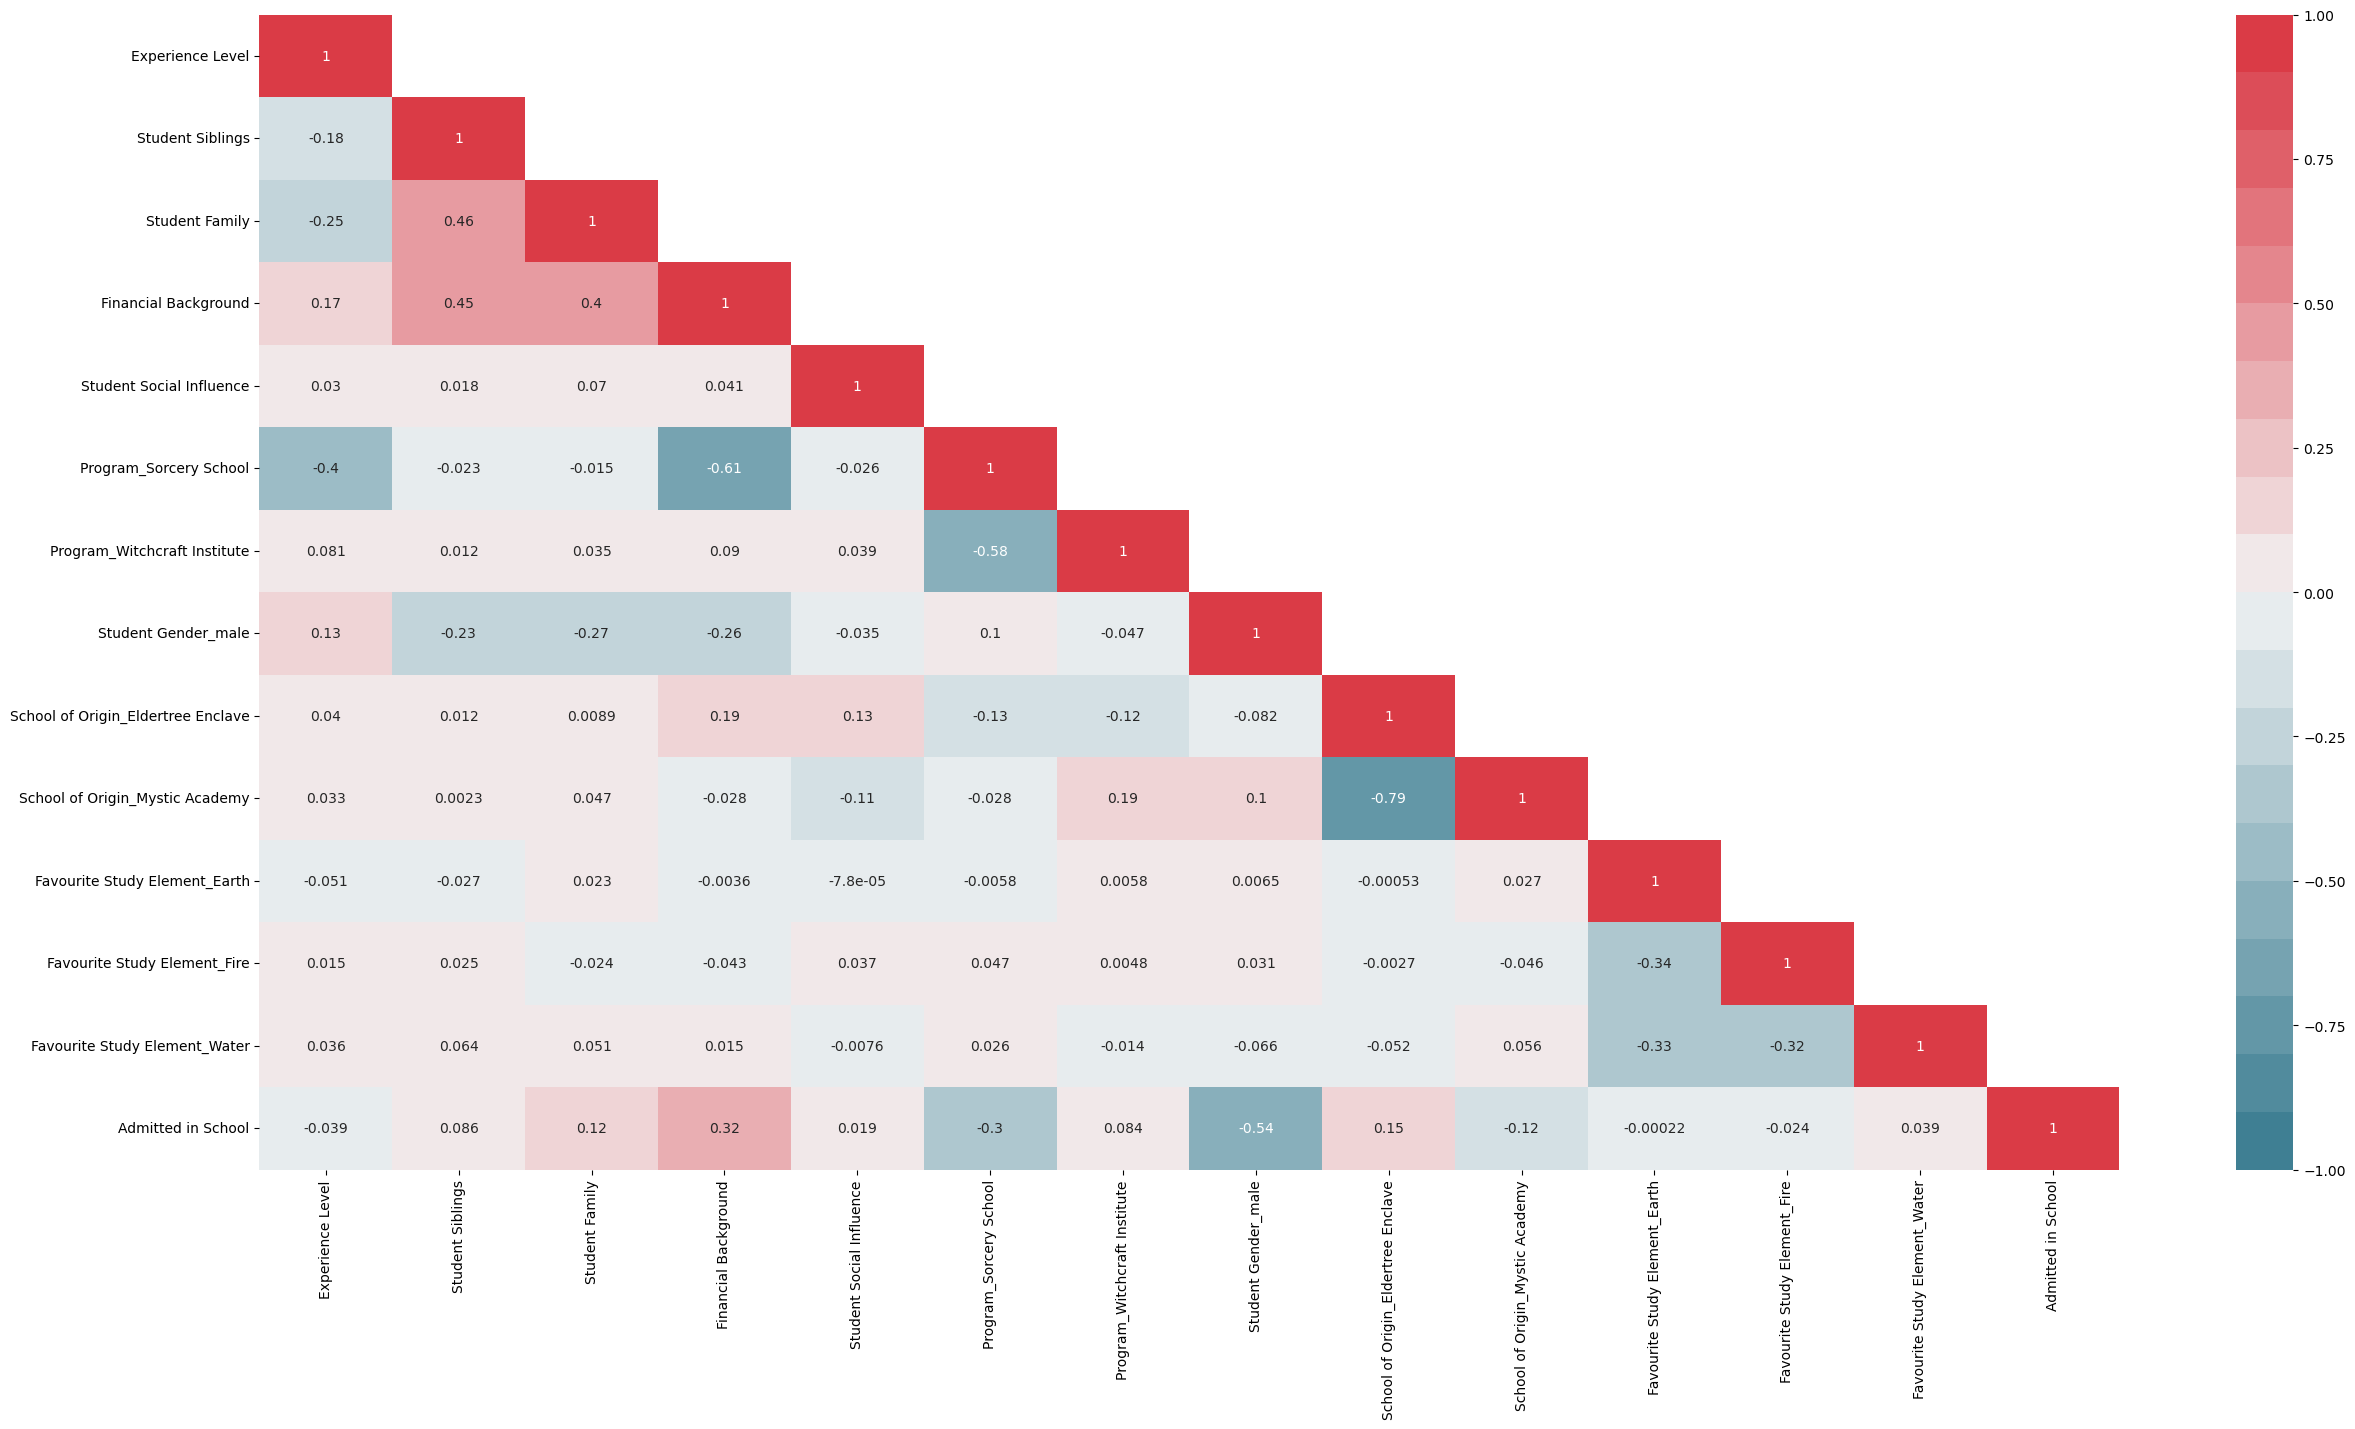



VIF:
Variables with Moderate Multicollinearity:
                              Features  VIF Factor
1                     Student Siblings    1.632956
2                       Student Family    1.647905
12       Favourite Study Element_Water    1.907836
10       Favourite Study Element_Earth    1.940876
11        Favourite Study Element_Fire    1.961757
3                 Financial Background    2.036707
6         Program_Witchcraft Institute    2.208968
8   School of Origin_Eldertree Enclave    2.704842
7                  Student Gender_male    3.249935
5               Program_Sorcery School    3.935430
4             Student Social Influence    4.253403

Variables with High Multicollinearity (discard):
                          Features  VIF Factor
0                 Experience Level    5.873035
9  School of Origin_Mystic Academy    7.923013


EXHAUSTIVE:
Variable Occurrences:
-> Experience Level: 100
-> Student Siblings: 100
-> Student Family: 65
-> Financial Background: 93
-> Program_

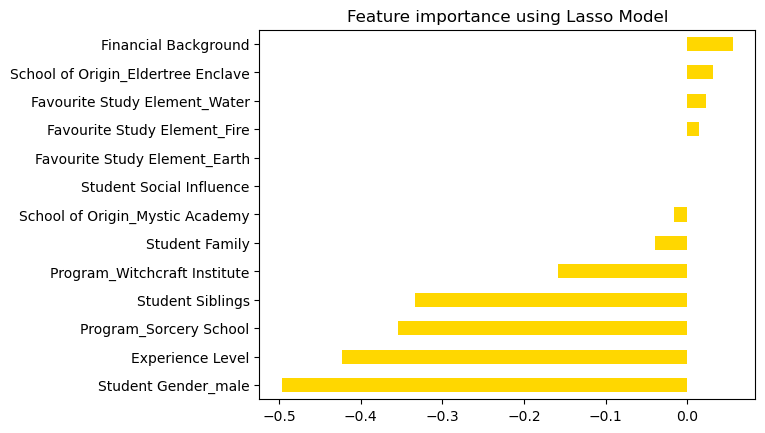

In [39]:
feature_selection(X_train, y_train, iterations=100, scaler=MinMaxScaler())

| Predictor | Chi-Square | Univariate | Tree-Based | Spearman | VIF | Exhaustive | Lasso | What to do? | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Experience Level | *Not applicable* | Keep | Keep | Discard | Discard | Keep | Keep | Discard |
| Student Siblings | *Not applicable* | Keep | Keep | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Student Family | *Not applicable* | Keep | Keep | Discard | Keep | Keep(?) | Keep(?) | <b>Include in the model<b> |
| Financial Background | *Not applicable* | Keep | Keep | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Student Social Influence | *Not applicable* | Keep | Keep | Discard | Keep | Keep(?) | Discard | Discard |
| Program_Sorcery School | Keep | Keep | Keep | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Program_Witchcraft Institute | Keep | Keep | Discard | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Student Gender_male | Keep | Keep | Keep | Keep(?) | Keep | Keep | Keep | <b>Include in the model<b> |
| School of Origin_Eldertree Enclave | Keep | Keep | Discard | Discard | Keep | Keep | Keep(?) | <b>Include in the model<b> |
| School of Origin_Mystic Academy | Keep | Keep | Discard | Discard | Discard | Keep(?) | Keep(?) | Discard |
| Favourite Study Element_Earth | Discard | Keep | Discard | Discard | Keep | Keep(?) | Discard | Discard |
| Favourite Study Element_Fire | Discard | Keep | Discard | Discard | Keep | Discard | Keep(?) | Discard |
| Favourite Study Element_Water | Discard | Keep | Discard | Discard | Keep | Discard | Keep(?) | Discard |

In [44]:
# Drop the columns excluded by MinMax scaler feature selection
X_train_mm_fs = X_train.drop(columns=['Experience Level', 'Student Social Influence', 'School of Origin_Mystic Academy', 
                                      'Favourite Study Element_Earth', 'Favourite Study Element_Fire', 'Favourite Study Element_Water'])

## <font color='skyblue'> Robust Scaler <a class="anchor" id="P3.6"></a>



UNIVARIATE VARIABLES:
Experience Level                      0.715217
Student Siblings                      1.117855
Student Family                        0.594418
Financial Background                  5.317236
Student Social Influence              0.335400
Program_Sorcery School                0.248007
Program_Witchcraft Institute          0.171163
Student Gender_male                   0.225420
School of Origin_Eldertree Enclave    0.151071
School of Origin_Mystic Academy       0.195085
Favourite Study Element_Earth         0.191736
Favourite Study Element_Fire          0.188986
Favourite Study Element_Water         0.180358
dtype: float64


TREE-BASED:

Selected features:
-> Experience Level
-> Student Siblings
-> Student Family
-> Financial Background
-> Student Social Influence
-> Program_Sorcery School
-> Student Gender_male


CORRELATIONS:


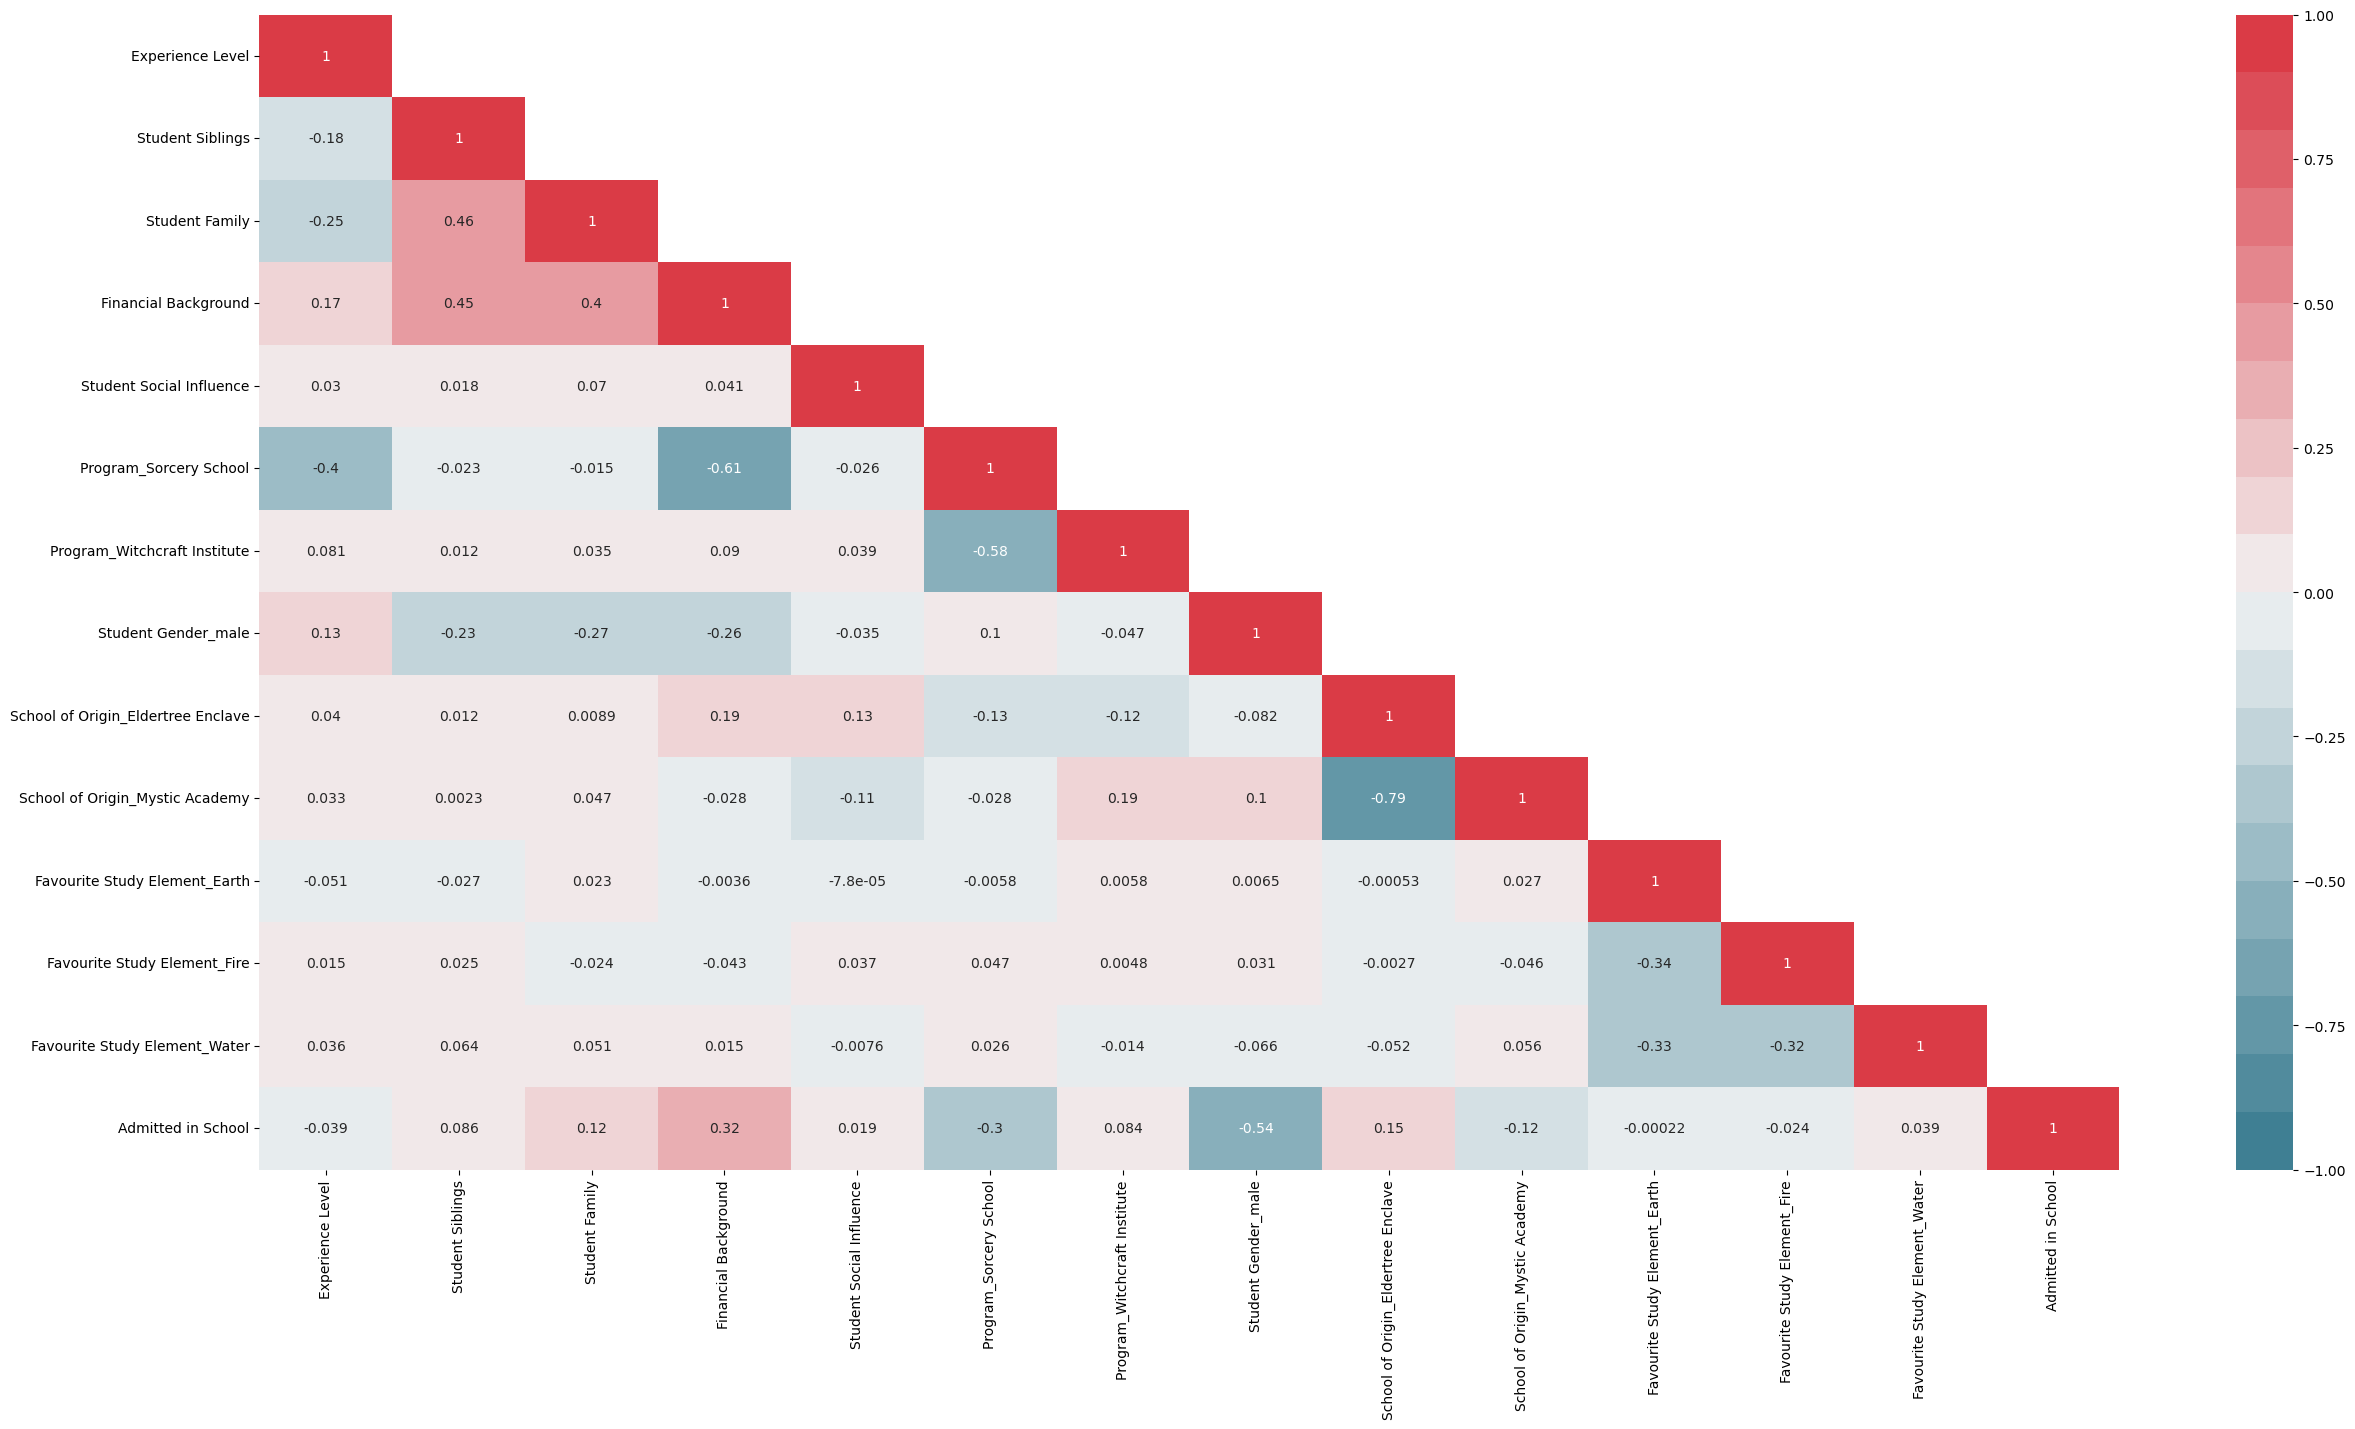



VIF:
Variables with Moderate Multicollinearity:
                              Features  VIF Factor
1                     Student Siblings    1.632956
2                       Student Family    1.647905
12       Favourite Study Element_Water    1.907836
10       Favourite Study Element_Earth    1.940876
11        Favourite Study Element_Fire    1.961757
3                 Financial Background    2.036707
6         Program_Witchcraft Institute    2.208968
8   School of Origin_Eldertree Enclave    2.704842
7                  Student Gender_male    3.249935
5               Program_Sorcery School    3.935430
4             Student Social Influence    4.253403

Variables with High Multicollinearity (discard):
                          Features  VIF Factor
0                 Experience Level    5.873035
9  School of Origin_Mystic Academy    7.923013


EXHAUSTIVE:
Variable Occurrences:
-> Experience Level: 100
-> Student Siblings: 100
-> Program_Sorcery School: 100
-> Program_Witchcraft Institut

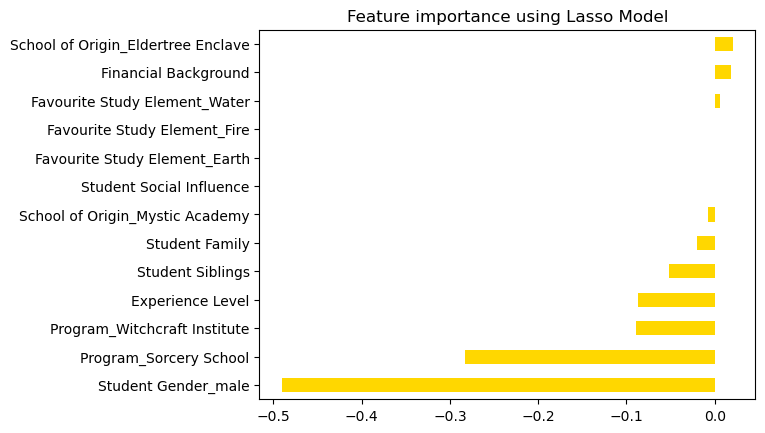

In [40]:
feature_selection(X_train, y_train, iterations=100, scaler=RobustScaler())

| Predictor | Chi-Square | Univariate | Tree-Based | Spearman | VIF | Exhaustive | Lasso | What to do? | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Experience Level | *Not applicable* | Keep | Keep | Discard | Discard | Keep | Keep | Discard |
| Student Siblings | *Not applicable* | Keep | Keep | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Student Family | *Not applicable* | Keep | Keep | Discard | Keep | Discard | Keep(?) | Discard |
| Financial Background | *Not applicable* | Keep | Keep | Discard | Keep | Discard | Keep(?) | Discard |
| Student Social Influence | *Not applicable* | Keep | Keep | Discard | Keep | Keep(?) | Discard | Discard |
| Program_Sorcery School | Keep | Keep | Keep | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Program_Witchcraft Institute | Keep | Keep | Discard | Discard | Keep | Keep | Keep | <b>Include in the model<b> |
| Student Gender_male | Keep | Keep | Keep | Keep(?) | Keep | Keep | Keep | <b>Include in the model<b> |
| School of Origin_Eldertree Enclave | Keep | Keep | Discard | Discard | Keep | Keep(?) | Keep(?) | <b>Include in the model<b> |
| School of Origin_Mystic Academy | Keep | Keep | Discard | Discard | Discard | Keep | Keep(?) | Discard |
| Favourite Study Element_Earth | Discard | Keep | Discard | Discard | Keep | Discard | Discard | Discard |
| Favourite Study Element_Fire | Discard | Keep | Discard | Discard | Keep | Discard | Discard | Discard |
| Favourite Study Element_Water | Discard | Keep | Discard | Discard | Keep | Keep(?) | Keep(?) | Discard |

In [45]:
# Drop the columns excluded by Robust scaler feature selection
X_train_rb_fs = X_train.drop(columns=['Experience Level', 'Student Family', 'Financial Background', 'Student Social Influence', 'School of Origin_Mystic Academy', 
                                      'Favourite Study Element_Earth', 'Favourite Study Element_Fire', 'Favourite Study Element_Water'])

## <font color='skyblue'> Principal Component Analysis (PCA) </font> <a class="anchor" id="P3.7"></a>

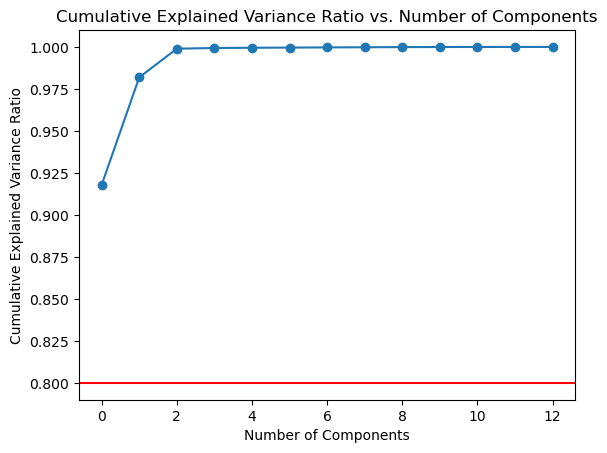

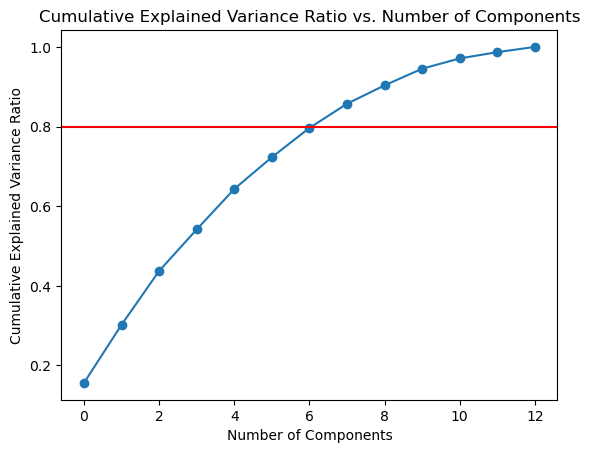

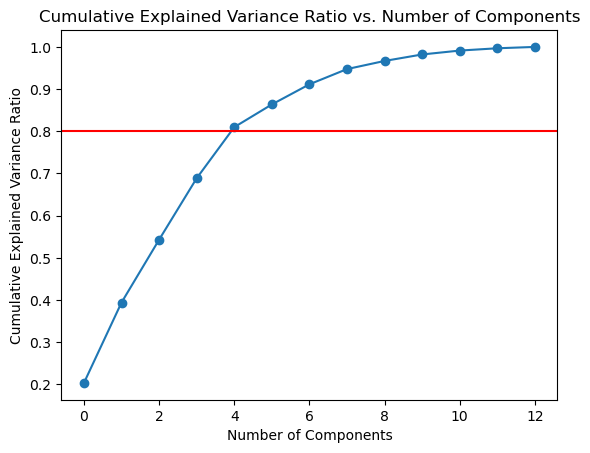

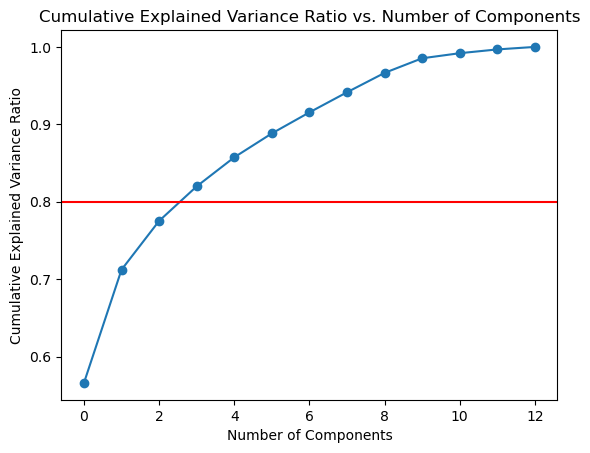

In [47]:
# Perform Principal Component Analysis for each scaler (including no scaler)
pc_ns = pc_analysis(X_train)
pc_st = pc_analysis(X_train_st)
pc_mm = pc_analysis(X_train_mm)
pc_rb = pc_analysis(X_train_rb)

# <font color='darkblue'> Model Evaluation </font> <a class="anchor" id="P4"></a>
  [Back to TOC](#toc)

In [46]:
# Define dictionary with the different models to be tested
models_dict = {None: [X_train, X_train_ns_fs],
               StandardScaler(): [X_train, X_train_st_fs, X_train_st_fs_2],
               MinMaxScaler(): [X_train, X_train_mm_fs],
               RobustScaler(): [X_train, X_train_rb_fs]
               }

## <font color='skyblue'> Logistic Regression <a class="anchor" id="P4.1"></a>

In [49]:
logr = LogisticRegression()

logr_parameters = {
    'estimator__penalty': ['l1', 'l2', 'elasticnet', None],
    'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'estimator__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'estimator__multi_class': ['ovr', 'multinomial'],
    'estimator__class_weight': [None, 'balanced'],
    'estimator__tol': [1e-4, 1e-3, 1e-2]
}

In [179]:
for scaling, datasets in models_dict.items():
    for dataset in datasets:
        print(f'[{scaling}]', dataset.columns)
        model_evaluator(logr, logr_parameters, dataset, y_train, scaler=scaling)
        print('\n')

[None] Index(['Experience Level', 'Student Siblings', 'Student Family',
       'Financial Background', 'Student Social Influence',
       'Program_Sorcery School', 'Program_Witchcraft Institute',
       'Student Gender_male', 'School of Origin_Eldertree Enclave',
       'School of Origin_Mystic Academy', 'Favourite Study Element_Earth',
       'Favourite Study Element_Fire', 'Favourite Study Element_Water'],
      dtype='object')
Best parameters: {'estimator__C': 10, 'estimator__class_weight': None, 'estimator__multi_class': 'multinomial', 'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg', 'estimator__tol': 0.0001}
Best score: 0.7229465453825119


[None] Index(['Student Siblings', 'Program_Sorcery School',
       'Program_Witchcraft Institute', 'Student Gender_male',
       'School of Origin_Eldertree Enclave'],
      dtype='object')
Best parameters: {'estimator__C': 0.001, 'estimator__class_weight': None, 'estimator__multi_class': 'ovr', 'estimator__penalty': None, 'estimat

In [47]:
best_logr = LogisticRegression(C=1, class_weight=None, multi_class='ovr', penalty=None, solver='sag', tol=0.01)
avg_score(best_logr, X_train, y_train, scaler=MinMaxScaler())

('0.74+/-0.01', '0.723+/-0.05')

## <font color='skyblue'> Decision Tree <a class="anchor" id="P4.2"></a>

In [180]:
dt = DecisionTreeClassifier()

dt_parameters = {
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__splitter': ['best', 'random'],
    'estimator__max_features': ['auto', 'sqrt', None],
    'estimator__max_depth': [None, 10, 15, 20, 25, 30],
    'estimator__max_leaf_nodes': [20, 50, 75, 100],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 3, 4, 5],
    'estimator__class_weight': [None, 'balanced'],
    'estimator__ccp_alpha': [0.0, 0.01, 0.1]
    }

In [181]:
for scaling, datasets in models_dict.items():
    for dataset in datasets:
        print(f'[{scaling}]', dataset.columns)
        model_evaluator(dt, dt_parameters, dataset, y_train, scaler=scaling)
        print('\n')

[None] Index(['Experience Level', 'Student Siblings', 'Student Family',
       'Financial Background', 'Student Social Influence',
       'Program_Sorcery School', 'Program_Witchcraft Institute',
       'Student Gender_male', 'School of Origin_Eldertree Enclave',
       'School of Origin_Mystic Academy', 'Favourite Study Element_Earth',
       'Favourite Study Element_Fire', 'Favourite Study Element_Water'],
      dtype='object')
Best parameters: {'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': 50, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__splitter': 'best'}
Best score: 0.766691650628386


[None] Index(['Student Siblings', 'Program_Sorcery School',
       'Program_Witchcraft Institute', 'Student Gender_male',
       'School of Origin_Eldertree Enclave'],
      dtype='object')
Best parameters: {'estimator__ccp_al

In [48]:
best_dt = DecisionTreeClassifier(ccp_alpha=0.0, 
                            class_weight=None, 
                            criterion='gini', 
                            max_depth=None, 
                            max_features=None,
                            max_leaf_nodes=50,
                            min_samples_leaf=1,
                            min_samples_split=5, 
                            splitter='best'
                            )
avg_score(best_dt, X_train, y_train)

('0.899+/-0.01', '0.759+/-0.07')

## <font color='skyblue'> KNeighbors <a class="anchor" id="P4.3"></a>

In [189]:
kn = KNeighborsClassifier()

kn_parameters = {
    'estimator__n_neighbors': [3, 5, 7, 9],
    'estimator__metric': ['euclidean', 'manhattan', 'minkowski'],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'estimator__leaf_size': [30, 60, 90],
    'estimator__p': [1, 2]
    }

In [190]:
for scaling, datasets in models_dict.items():
    for dataset in datasets:
        print(f'[{scaling}]', dataset.columns)
        model_evaluator(kn, kn_parameters, dataset, y_train, scaler=scaling)
        print('\n')

[None] Index(['Experience Level', 'Student Siblings', 'Student Family',
       'Financial Background', 'Student Social Influence',
       'Program_Sorcery School', 'Program_Witchcraft Institute',
       'Student Gender_male', 'School of Origin_Eldertree Enclave',
       'School of Origin_Mystic Academy', 'Favourite Study Element_Earth',
       'Favourite Study Element_Fire', 'Favourite Study Element_Water'],
      dtype='object')
Best parameters: {'estimator__algorithm': 'brute', 'estimator__leaf_size': 30, 'estimator__metric': 'manhattan', 'estimator__n_neighbors': 3, 'estimator__p': 1, 'estimator__weights': 'distance'}
Best score: 0.5762646885775013


[None] Index(['Student Siblings', 'Program_Sorcery School',
       'Program_Witchcraft Institute', 'Student Gender_male',
       'School of Origin_Eldertree Enclave'],
      dtype='object')
Best parameters: {'estimator__algorithm': 'auto', 'estimator__leaf_size': 30, 'estimator__metric': 'euclidean', 'estimator__n_neighbors': 9, 'estima

In [49]:
best_kn = KNeighborsClassifier(algorithm='auto',
                               leaf_size=60,
                               metric='euclidean',
                               n_neighbors=7,
                               p=1,
                               weights='uniform'
                               )
avg_score(best_kn, X_train_st_fs, y_train, scaler=StandardScaler())

('0.761+/-0.01', '0.737+/-0.05')

## <font color='skyblue'> Naive-Bayes <a class="anchor" id="P4.4"></a>

In [65]:
nb = GaussianNB()

nb_parameters = {
    'estimator__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }

In [66]:
for scaling, datasets in models_dict.items():
    for dataset in datasets:
        print(f'[{scaling}]', dataset.columns)
        model_evaluator(nb, nb_parameters, dataset, y_train, scaler=scaling)
        print('\n')

[None] Index(['Experience Level', 'Student Siblings', 'Student Family',
       'Financial Background', 'Student Social Influence',
       'Program_Sorcery School', 'Program_Witchcraft Institute',
       'Student Gender_male', 'School of Origin_Eldertree Enclave',
       'School of Origin_Mystic Academy', 'Favourite Study Element_Earth',
       'Favourite Study Element_Fire', 'Favourite Study Element_Water'],
      dtype='object')
Best parameters: {'estimator__var_smoothing': 1e-06}
Best score: 0.6943409136044324


[None] Index(['Student Siblings', 'Program_Sorcery School',
       'Program_Witchcraft Institute', 'Student Gender_male',
       'School of Origin_Eldertree Enclave'],
      dtype='object')
Best parameters: {'estimator__var_smoothing': 1e-09}
Best score: 0.6983330441029822


[StandardScaler()] Index(['Experience Level', 'Student Siblings', 'Student Family',
       'Financial Background', 'Student Social Influence',
       'Program_Sorcery School', 'Program_Witchcraft Institut

In [50]:
best_nb = GaussianNB(var_smoothing=1e-09)
avg_score(best_kn, X_train_st_fs_2, y_train, scaler=StandardScaler())

('0.714+/-0.01', '0.712+/-0.07')

## <font color='skyblue'> Multi-Layer Perceptron <a class="anchor" id="P4.5"></a>

In [57]:
mlp = MLPClassifier()

mlp_parameters = {
    'estimator__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'estimator__activation': ['tanh', 'relu'],
    'estimator__solver': ['sgd', 'adam'],
    'estimator__alpha': [0.0001, 0.05],
    'estimator__learning_rate': ['constant','adaptive'],
    }

In [58]:
for scaling, datasets in models_dict.items():
    for dataset in datasets:
        print(f'[{scaling}]', dataset.columns)
        model_evaluator(mlp, mlp_parameters, dataset, y_train, scaler=scaling)
        print('\n')

[None] Index(['Experience Level', 'Student Siblings', 'Student Family',
       'Financial Background', 'Student Social Influence',
       'Program_Sorcery School', 'Program_Witchcraft Institute',
       'Student Gender_male', 'School of Origin_Eldertree Enclave',
       'School of Origin_Mystic Academy', 'Favourite Study Element_Earth',
       'Favourite Study Element_Fire', 'Favourite Study Element_Water'],
      dtype='object')
Best parameters: {'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'adaptive', 'estimator__solver': 'adam'}
Best score: 0.7187505911960075


[None] Index(['Student Siblings', 'Program_Sorcery School',
       'Program_Witchcraft Institute', 'Student Gender_male',
       'School of Origin_Eldertree Enclave'],
      dtype='object')
Best parameters: {'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'adapt

In [51]:
best_mlp = MLPClassifier(activation='tanh',
                         alpha=0.05,
                         hidden_layer_sizes=(100,),
                         learning_rate='adaptive',
                         solver='adam')
avg_score(best_mlp, X_train, y_train, scaler=StandardScaler())

('0.769+/-0.01', '0.728+/-0.06')

   # <font color='darkblue'> Best model </font> <a class="anchor" id="P5"></a>
  [Back to TOC](#toc)

In [52]:
# Dictionary containing selected models and their respective associated data and scalers
best_models = {
    best_logr: [X_train, MinMaxScaler()],
    best_dt: [X_train, None],
    best_kn: [X_train_st_fs, StandardScaler()],
    best_nb: [X_train_st_fs_2, StandardScaler()],
    best_mlp: [X_train, StandardScaler()]
}

# List to store the evaluation results for each model
results = []

# Iterate through each model and its associated data and scaler
for model, arg in best_models.items():
    # Calculate the average scores for the model using the specified data and scaler
    results.append(avg_score(model, arg[0], y_train, scaler=arg[1]))

# Create a DataFrame to store the results, with 'Train' and 'Validation' columns
# The index corresponds to the names of the models
results_df = pd.DataFrame(results, columns=['Train', 'Validation'],
                          index=['Logistic Regression', 'Decision Tree',
                                 'K-Nearest Neighbors', 'Naive Bayes',
                                 'Multi-Layer Perceptron'])

results_df

,Train,Validation
Logistic Regression,0.739+/-0.01,0.721+/-0.05
Decision Tree,0.899+/-0.01,0.762+/-0.07
K-Nearest Neighbors,0.761+/-0.01,0.737+/-0.05
Naive Bayes,0.698+/-0.01,0.698+/-0.05
Multi-Layer Perceptron,0.766+/-0.01,0.731+/-0.06


In [53]:
# Select columns in X_train_st based on columns present in X_train_st_fs
X_train_final = X_train_st[X_train_st_fs.columns]

# Select and sort columns in X_test_st based on columns present in X_train_st_fs
X_test_final = X_test_st[X_train_st_fs.columns].sort_index()

# Fit the best_kn (K-Nearest Neighbors) model on the training data
best_kn.fit(X_train_final, y_train)

# Generate predictions using the fitted K-Nearest Neighbors model on the test data
predictions = best_kn.predict(X_test_final)

# Create a DataFrame with predictions, indexed by the original index of X_test_final
y_test = pd.DataFrame(predictions, index=X_test_final.index, columns=['Admitted in School'])

# Print the counts of unique values in the 'Admitted in School' column of y_test
print(y_test['Admitted in School'].value_counts())

0    113
1     63
Name: Admitted in School, dtype: int64


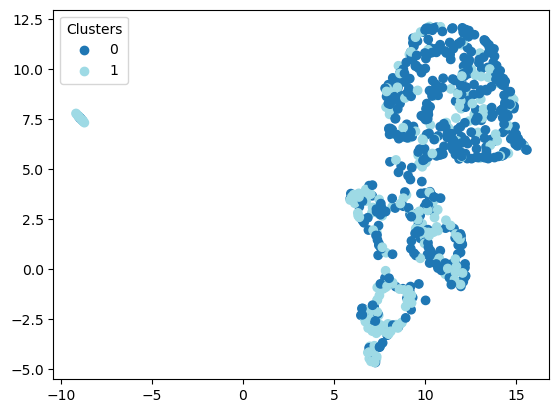

In [61]:
# Create a UMAP object for dimensionality reduction
umap_object = umap.UMAP(n_neighbors=15, min_dist=0.3, random_state=42)

# Fit the UMAP object to the training data and transform it to a lower-dimensional space
umap_embedding = umap_object.fit_transform(X_train)

# Visualize the reduced dimensions using a custom function 'visualize_dimensionality_reduction'
# This function likely plots or visualizes the reduced dimensions against the target variable (y_train)
visualize_dimensionality_reduction(umap_embedding, y_train)

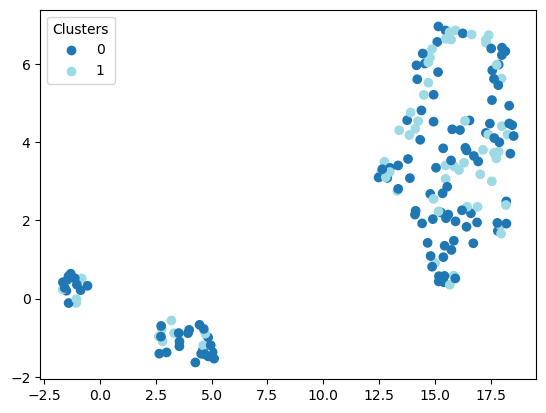

In [63]:
# Fit the UMAP object to the test data and transform it to a lower-dimensional space
umap_embedding = umap_object.fit_transform(X_test)

# Visualize the reduced dimensions using a custom function 'visualize_dimensionality_reduction'
# This function likely plots or visualizes the reduced dimensions against the predicted target variable (y_test)
visualize_dimensionality_reduction(umap_embedding, y_test)

In [64]:
# Save the predictions (y_test) as a CSV file
y_test.to_csv('ml_datasets\\Group11_Version03.csv', index=True)

 [Back to TOC](#toc)